# **Project-Based Virtual Intern: ID/X Partners Data Scientist x Rakamin Academy**

<div align=center>
  <img src="https://algorit.ma/wp-content/uploads/2021/03/Logo-IDX-Partners.jpg"/>
</div>

- Nama: Naufal Rahfi Anugerah
- Github: @rahfianugerah

## **Mengimpor Perpustakaan yang Diperlukan (Import Required Libraries)**

<p align=justify>
Sebelum melakukan analisis data, kita perlu mengimpor beberapa pustaka (libraries) yang diperlukan. Pustaka ini akan membantu dalam manipulasi data, analisis statistik, dan visualisasi. (Before performing data analysis, we need to import some necessary libraries. These libraries will help in data manipulation, statistical analysis, and visualization.)
</p>

### **Mengapa Mengimpor Perpustakaan? (Why Import Libraries?)**
- Memudahkan manipulasi data (Easy data manipulation).
- Analisis data lebih cepat dan efisien (Faster and more efficient data analysis).
- Mempermudah eksplorasi dan pemodelan (Simplify exploration and modeling)

In [1]:
# Importing the libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

## **Memuat Dataset (Data Loading)**

<p align=justify>
Setelah mengimpor perpustakaan yang dibutuhkan, langkah berikutnya adalah memuat dataset ke dalam lingkungan kerja Jupyter Notebook agar dapat dianalisis lebih lanjut (After importing the required libraries, the next step is to load the dataset into the Jupyter Notebook working environment for further analysis).
</p>

### **Mengapa Memuat Dataset?**
- **Memulai eksplorasi data (Starting data exploration)**: Dataset harus dimuat sebelum dapat dianalisis atau dimanipulasi (Datasets must be loaded before they can be analyzed or manipulated).
- **Memastikan format data sesuai (Ensure the data format is appropriate)**: Data bisa berupa berbagai format seperti CSV, Excel, JSON, dan lainnya (Data can be in various formats such as CSV, Excel, JSON, and others).
- **Mengecek kualitas data (Checking data quality)**: Memastikan tidak ada data yang hilang atau terduplikasi (Ensure there is no missing or duplicated data).


### **Mengunduh dataset (Download Dataset)**

---



In [2]:
# Download dataset using curl
!curl https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv -o loan_data_2007_2014.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  228M  100  228M    0     0  12.4M      0  0:00:18  0:00:18 --:--:-- 15.0M


### **Mengubah nama dataset (Renaming Dataset)**

<p align=justify>
Sering kali, dataset yang diunduh atau diberikan memiliki nama yang kurang deskriptif atau sulit diakses dalam kode. Oleh karena itu, mengganti nama file dataset dapat membantu meningkatkan keterbacaan dan efisiensi dalam analisis data (Many times, downloaded or provided datasets have names that are less descriptive or difficult to access in code. Therefore, renaming dataset files can help improve readability and efficiency in data analysis).
</p>

### **Mengapa Mengganti Nama Dataset? (Why Rename a Dataset?)**
- **Mempermudah akses (Easier access)**: Nama yang lebih ringkas dan deskriptif lebih mudah digunakan dalam kode (More concise and descriptive names are easier to use in code).
- **Meningkatkan keteraturan (Improves order)**: Konsistensi dalam penamaan file mempermudah pengelolaan data (Consistency in file naming makes it easier to manage data).
- **Menghindari kesalahan akses (Avoid access errors)**: Nama yang jelas mengurangi risiko kesalahan saat memanggil dataset dalam analisis (Clear names reduce the risk of errors when calling datasets in analysis).

In [3]:
# Rename the dataset for easier use
!mv loan_data_2007_2014.csv loan_data.csv

### **Memuat dataset ke dataframe (Load the dataset into a dataframe)**

In [4]:
# Load dataset into dataframe
df = pd.read_csv('loan_data.csv')

<ipython-input-4-085fa8f33992>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data.csv')


## **Pemahaman data (Data Understanding)**

<p align=justify>
Setelah memuat dataset, langkah selanjutnya adalah memahami struktur, fitur dan karakteristik data. Pemahaman data ini penting untuk memastikan bahwa dataset siap digunakan dalam analisis lebih lanjut (After loading the dataset, the next step is to understand the structure and characteristics of the data. Understanding the data is important to ensure that the dataset is ready to be used in further analysis).
</p>

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

<p align=justify>
Dataset ini memiliki 75 fitur atau kolom yang menawarkan wawasan potensial untuk model machine learning dapat memprediksi risiko penggunaan (This dataset has 75 features or columns that offer potential insights for machine learning models to predict the risk of use).
</p>

**Berikut merupakan penjelasan setiap fitur yang ada (The following is an explanation of each feature)**:

- ```acceptD```: Tanggal dimana peminjam menerima penawaran (The date which the borrower accepted the offer).
- ```accNowDelinq```: Jumlah akun yang saat ini ditunggak oleh peminjam (The number of accounts on which the borrower is now delinquent).
- ```accOpenPast24Mths```: Jumlah transaksi (trade) yang dibuka dalam 24 bulan terakhir (Number of trades opened in past 24 months).
- ```addrState```: Negara bagian yang diberikan oleh peminjam dalam aplikasi pinjaman (The state provided by the borrower in the loan application).
- ```all_util```: Rasio saldo terhadap limit kredit pada semua transaksi (Balance to credit limit on all trades).
- ```annual_inc_joint```: Total pendapatan tahunan gabungan yang dilaporkan oleh peminjam bersama co-borrower saat registrasi (The combined self-reported annual income provided by the co-borrowers during registration).
- ```annualInc```: Pendapatan tahunan yang dilaporkan oleh peminjam saat registrasi (The self-reported annual income provided by the borrower during registration).
- ```application_type```: Menunjukkan apakah aplikasi pinjaman diajukan secara individu atau bersama (Indicates whether the loan is an individual application or a joint application with two co-borrowers).
- ```avg_cur_bal```: Rata-rata saldo berjalan dari semua akun (Average current balance of all accounts).
- ```bcOpenToBuy```: Total limit kredit yang tersedia untuk pembelian pada kartu kredit (Total open to buy on revolving bankcards).
- ```bcUtil```: Rasio saldo berjalan total terhadap limit kredit pada semua akun kartu kredit (Ratio of total current balance to high credit/credit limit for all bankcard accounts).
- ```chargeoff_within_12_mths```: Jumlah charge-offs (penghapusan piutang macet) dalam 12 bulan (Number of charge-offs within 12 months).
- ```collections_12_mths_ex_med```: Jumlah koleksi (penagihan) dalam 12 bulan, tidak termasuk koleksi medis (Number of collections in 12 months excluding medical collections).
- ```creditPullD```: Tanggal dimana LC melakukan pengecekan kredit untuk pinjaman ini (The date LC pulled credit for this loan).
- ```delinq2Yrs```: Jumlah insiden keterlambatan pembayaran >30 hari dalam 2 tahun terakhir pada laporan kredit peminjam (The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years).
- ```delinqAmnt```: Jumlah tunggakan pada akun-akun yang saat ini ditunggak (The past-due amount owed for the accounts on which the borrower is now delinquent).
- ```desc```: Deskripsi pinjaman yang diberikan oleh peminjam (Loan description provided by the borrower).
- ```dti```: Rasio yang dihitung dengan membagi total pembayaran utang bulanan peminjam (tidak termasuk hipotek dan pinjaman LC) dengan pendapatan bulanan yang dilaporkan (A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income).
- ```dti_joint```: Rasio yang dihitung menggunakan total pembayaran utang bulanan co-borrower (tidak termasuk hipotek dan pinjaman LC) dibagi dengan pendapatan bulanan gabungan yang dilaporkan (A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income).
- ```earliestCrLine```: Tanggal pembukaan jalur kredit pertama yang dilaporkan oleh peminjam (The date the borrower's earliest reported credit line was opened).
- ```effective_int_rate```: Suku bunga efektif yang merupakan suku bunga pinjaman dikurangi estimasi LC atas dampak bunga yang belum tertagih sebelum charge off (The effective interest rate is equal to the interest rate on a Note reduced by Lending Club's estimate of the impact of uncollected interest prior to charge off).
- ```emp_title```: Jabatan pekerjaan yang diberikan oleh peminjam saat mengajukan pinjaman (The job title supplied by the Borrower when applying for the loan).
- ```empLength```: Lama masa kerja peminjam dalam tahun (Nilai antara 0-10, dimana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih) (Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years).
- ```expD```: Tanggal kedaluwarsa listing pinjaman (The date the listing will expire).
- ```expDefaultRate```: Perkiraan tingkat default (gagal bayar) pinjaman (The expected default rate of the loan).
- ```ficoRangeHigh```: Batas atas rentang skor FICO peminjam saat origination pinjaman (The upper boundary range the borrower’s FICO at loan origination belongs to).
- ```ficoRangeLow```: Batas bawah rentang skor FICO peminjam saat origination pinjaman (The lower boundary range the borrower’s FICO at loan origination belongs to).
- ```fundedAmnt```: Total jumlah dana yang dikomitmenkan untuk pinjaman tersebut pada saat itu (The total amount committed to that loan at that point in time).
- ```grade```: Grade pinjaman yang ditetapkan oleh LC (LC assigned loan grade).
- ```homeOwnership```: Status kepemilikan tempat tinggal yang dilaporkan peminjam saat registrasi (Nilai: RENT, OWN, MORTGAGE, OTHER) (The home ownership status provided by the borrower during registration).
- ```id```: ID LC unik yang ditetapkan untuk daftar pinjaman (A unique LC assigned ID for the loan listing).
- ```il_util```: Rasio saldo berjalan total terhadap limit kredit pada semua akun angsuran (installment accounts) (Ratio of total current balance to high credit/credit limit on all installment accounts).
- ```ils_exp_d```: Tanggal kedaluwarsa platform wholeloan (wholeloan platform expiration date).
- ```initialListStatus```: Status awal listing pinjaman (Nilai: W, F) (The initial listing status of the loan. Possible values are – W, F).
- ```inq_fi```: Jumlah pertanyaan (inquiries) terkait keuangan personal (Number of personal finance inquiries).
- ```inq_last_12m```: Jumlah pertanyaan kredit dalam 12 bulan terakhir (Number of credit inquiries in past 12 months).
- ```inqLast6Mths```: Jumlah pertanyaan kredit dalam 6 bulan terakhir (tidak termasuk pertanyaan untuk auto dan hipotek) (The number of inquiries in past 6 months excluding auto and mortgage inquiries).
- ```installment```: Pembayaran bulanan yang harus dibayar peminjam jika pinjaman disetujui (The monthly payment owed by the borrower if the loan originates).
- ```intRate```: Suku bunga pinjaman (Interest Rate on the loan).
- ```isIncV```: Menunjukkan apakah pendapatan telah diverifikasi oleh LC, tidak diverifikasi, atau sumber pendapatan diverifikasi (Indicates if income was verified by LC, not verified, or if the income source was verified).
- ```listD```: Tanggal aplikasi pinjaman peminjam dipublikasikan di platform (The date which the borrower's application was listed on the platform).
- ```loanAmnt```: Jumlah pinjaman yang diajukan oleh peminjam (jika kemudian dikurangi oleh departemen kredit, akan tercermin pada nilai ini) (The listed amount of the loan applied for by the borrower).
- ```max_bal_bc```: Saldo maksimum yang terhutang pada semua akun kartu kredit (Maximum current balance owed on all revolving accounts).
- ```memberId```: ID anggota LC unik untuk peminjam (A unique LC assigned Id for the borrower member).
- ```mo_sin_old_rev_tl_op```: Jumlah bulan sejak pembukaan akun revolving tertua (Months since oldest revolving account opened).
- ```mo_sin_rcnt_rev_tl_op```: Jumlah bulan sejak akun revolving yang paling baru dibuka (Months since most recent revolving account opened).
- ```mo_sin_rcnt_tl```: Jumlah bulan sejak akun (trade) yang paling baru dibuka (Months since most recent account opened).
- ```mortAcc```: Jumlah akun hipotek (Number of mortgage accounts).
- ```msa```: Wilayah Statistik Metropolitan peminjam (Metropolitan Statistical Area of the borrower).
- ```mths_since_last_major_derog```: Jumlah bulan sejak rating 90 hari atau lebih buruk terakhir (Months since most recent 90-day or worse rating).
- ```mths_since_oldest_il_open```: Jumlah bulan sejak akun angsuran (installment) tertua dibuka (Months since oldest bank installment account opened).
- ```mths_since_rcnt_il```: Jumlah bulan sejak akun angsuran (installment) terbaru dibuka (Months since most recent installment accounts opened).
- ```mthsSinceLastDelinq```: Jumlah bulan sejak keterlambatan pembayaran terakhir peminjam (The number of months since the borrower's last delinquency).
- ```mthsSinceLastRecord```: Jumlah bulan sejak catatan publik terakhir (The number of months since the last public record).
- ```mthsSinceMostRecentInq```: Jumlah bulan sejak pertanyaan kredit terbaru (Months since most recent inquiry).
- ```mthsSinceRecentBc```: Jumlah bulan sejak akun kartu kredit terbaru dibuka (Months since most recent bankcard account opened).
- ```mthsSinceRecentLoanDelinq```: Jumlah bulan sejak keterlambatan pinjaman personal terbaru (Months since most recent personal finance delinquency).
- ```mthsSinceRecentRevolDelinq```: Jumlah bulan sejak keterlambatan revolving terbaru (Months since most recent revolving delinquency).
- ```num_accts_ever_120_pd```: Jumlah akun yang pernah terlambat 120 hari atau lebih (Number of accounts ever 120 or more days past due).
- ```num_actv_bc_tl```: Jumlah akun kartu kredit aktif saat ini (Number of currently active bankcard accounts).
- ```num_actv_rev_tl```: Jumlah transaksi revolving aktif saat ini (Number of currently active revolving trades).
- ```num_bc_sats```: Jumlah akun kartu kredit dengan status memuaskan (Number of satisfactory bankcard accounts).
- ```num_bc_tl```: Jumlah akun kartu kredit (Number of bankcard accounts).
- ```num_il_tl```: Jumlah akun angsuran (installment accounts) (Number of installment accounts).
- ```num_op_rev_tl```: Jumlah akun revolving yang terbuka (Number of open revolving accounts).
- ```num_rev_accts```: Jumlah akun revolving (Number of revolving accounts).
- ```num_rev_tl_bal_gt_0```: Jumlah transaksi revolving yang memiliki saldo lebih dari 0 (Number of revolving trades with balance >0).
- ```num_sats```: Jumlah akun dengan status memuaskan (Number of satisfactory accounts).
- ```num_tl_120dpd_2m```: Jumlah akun yang saat ini terlambat 120 hari (diperbarui dalam 2 bulan terakhir) (Number of accounts currently 120 days past due, updated in past 2 months).
- ```num_tl_30dpd```: Jumlah akun yang saat ini terlambat 30 hari (diperbarui dalam 2 bulan terakhir) (Number of accounts currently 30 days past due, updated in past 2 months).
- ```num_tl_90g_dpd_24m```: Jumlah akun yang terlambat 90 hari atau lebih dalam 24 bulan terakhir (Number of accounts 90 or more days past due in last 24 months).
- ```num_tl_op_past_12m```: Jumlah akun yang dibuka dalam 12 bulan terakhir (Number of accounts opened in past 12 months).
- ```open_acc_6m```: Jumlah transaksi (trade) terbuka dalam 6 bulan terakhir (Number of open trades in last 6 months).
- ```open_il_12m```: Jumlah akun angsuran yang dibuka dalam 12 bulan terakhir (Number of installment accounts opened in past 12 months).
- ```open_il_24m```: Jumlah akun angsuran yang dibuka dalam 24 bulan terakhir (Number of installment accounts opened in past 24 months).
- ```open_il_6m```: Jumlah transaksi angsuran aktif saat ini (Number of currently active installment trades).
- ```open_rv_12m```: Jumlah transaksi revolving yang dibuka dalam 12 bulan terakhir (Number of revolving trades opened in past 12 months).
- ```open_rv_24m```: Jumlah transaksi revolving yang dibuka dalam 24 bulan terakhir (Number of revolving trades opened in past 24 months).
- ```openAcc```: Jumlah jalur kredit terbuka dalam laporan kredit peminjam (The number of open credit lines in the borrower's credit file).
- ```pct_tl_nvr_dlq```: Persentase transaksi yang tidak pernah mengalami keterlambatan (Percent of trades never delinquent).
- ```percentBcGt75```: Persentase akun kartu kredit yang menggunakan lebih dari 75% limit (Percentage of all bankcard accounts > 75% of limit).
- ```pub_rec_bankruptcies```: Jumlah kebangkrutan yang tercatat dalam catatan publik (Number of public record bankruptcies).
- ```pubRec```: Jumlah catatan publik negatif (derogatory public records) (Number of derogatory public records).
- ```purpose```: Kategori pinjaman yang diajukan oleh peminjam (A category provided by the borrower for the loan request).
- ```reviewStatus```: Status pinjaman selama periode listing (Nilai: APPROVED, NOT_APPROVED) (The status of the loan during the listing period).
- ```reviewStatusD```: Tanggal saat aplikasi pinjaman direview oleh LC (The date the loan application was reviewed by LC).
- ```revolBal```: Total saldo kredit revolving (Total credit revolving balance).
- ```revolUtil```: Rasio pemanfaatan jalur kredit revolving (jumlah kredit yang digunakan dibandingkan dengan kredit yang tersedia) (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit).
- ```serviceFeeRate```: Tarif biaya layanan yang dibayar investor untuk pinjaman ini (Service fee rate paid by the investor for this loan).
- ```subGrade```: Subgrade pinjaman yang ditetapkan oleh LC (LC assigned loan subgrade).
- ```tax_liens```: Jumlah beban pajak yang menempel (Number of tax liens).
- ```term```: Jumlah pembayaran pinjaman (dalam bulan, biasanya 36 atau 60) (The number of payments on the loan. Values are in months and can be either 36 or 60).
- ```title```: Judul pinjaman yang diberikan oleh peminjam (The loan title provided by the borrower).
- ```tot_coll_amt```: Total jumlah yang pernah tertagih dari koleksi (Total collection amounts ever owed).
- ```tot_cur_bal```: Total saldo berjalan dari semua akun (Total current balance of all accounts).
- ```tot_hi_cred_lim```: Total limit kredit atau high credit (Total high credit/credit limit).
- ```total_bal_il```: Total saldo berjalan dari semua akun angsuran (Total current balance of all installment accounts).
- ```total_cu_t```: Jumlah transaksi finansial (Number of finance trades).
- ```total_il_high_credit_limit```: Total limit kredit pada akun angsuran (Total installment high credit/credit limit).
- ```total_rev_hi_lim```: Total limit kredit pada akun revolving (Total revolving high credit/credit limit).
- ```totalAcc```: Total jumlah jalur kredit dalam laporan kredit peminjam (The total number of credit lines currently in the borrower's credit file).
- ```totalBalExMort```: Total saldo kredit, tidak termasuk hipotek (Total credit balance excluding mortgage).
- ```totalBcLimit```: Total limit kredit pada akun kartu kredit (Total bankcard high credit/credit limit).
- ```url```: URL halaman LC untuk data listing pinjaman (URL for the LC page with listing data).
- ```verified_status_joint```: Menunjukkan apakah pendapatan bersama co-borrower telah diverifikasi oleh LC, tidak diverifikasi, atau sumber pendapatan diverifikasi (Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified).
- ```zip_code```: Tiga digit pertama kode pos yang diberikan oleh peminjam pada aplikasi pinjaman (The first 3 numbers of the zip code provided by the borrower in the loan application).

**Disclaimer**:
<p align=justify>
Dataset ini hanya mencantumkan 75 fitur. Perlu diketahui bahwa kemungkinan besar fitur-fitur lain telah diseleksi atau dikurangi dari dataset asli untuk tujuan penyederhanaan, peningkatan kinerja analisis, serta untuk memenuhi standar privasi dan kepatuhan. Pastikan untuk mengacu pada dokumentasi resmi dataset untuk informasi lengkap mengenai proses seleksi dan transformasi fitur yang dilakukan (This dataset only includes 75 features. Please note that other features have likely been selected or reduced from the original dataset for purposes of simplification, improved analysis performance, and to meet privacy and compliance standards. Be sure to refer to the dataset’s official documentation for full details on the feature selection and transformation process).
</p>

Source: <a href="https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit?gid=1001272030#gid=1001272030">Click here!</a>

### **Penilaian data (Data Assesing)**

<p align=justify>
Setelah memahami struktur dan karakteristik dataset, langkah selanjutnya adalah melakukan <b>penilaian data</b> untuk mengidentifikasi potensi masalah yang perlu dibersihkan sebelum analisis lebih lanjut.
</p>

<p align=justify>
After understanding the data set structure and characteristics, the next step is to perform <b>data assessment</b> to identify issues that need to be cleaned up before further analysis.
</p>

### **Mengapa Penilaian Data Penting?**
- **Mengidentifikasi masalah kualitas data**, seperti:
  - Data yang hilang (missing values)
  - Data yang duplikat
  - Inkonsistensi dalam format data
- **Memastikan data siap digunakan** sebelum proses analisis atau model machine learning.

### **Why is Data Assessment Important?**
- **Identify data quality issues**, such as:
- Missing data (missing values)
- Duplicate data
- Inconsistencies in data format
- **Ensure data is ready to use** before analysis or machine learning models.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

<p align=justify>
Kode diatas menjelaskan berbagai macam tipe data pada setiap kolom ataupun fitur yang ada pada dataset (The code above explains the various types of data in each column or feature in the dataset).
</p>

In [8]:
def data_assessment(data):

    print("\n--- Data Assessment Report ---\n")

    # Missing values
    missing_values = data.isna().sum()
    null_values = data.isnull().sum()
    missing_percentage = (missing_values / len(data)) * 100
    missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    missing_report = missing_report[missing_report['Missing Values'] > 0]

    print("Missing Values per Column:")
    print(missing_report.sort_values(by='Missing Values', ascending=False))
    print("\nTotal Missing Values:", missing_values.sum())

    print("\nTotal Null Values:", null_values.sum())

    # Data shape
    print("\nDataset Shape (Rows, Columns):", data.shape)

    # Duplicated data
    total_duplicates = data.duplicated().sum()
    print("\nTotal Duplicated Rows:", total_duplicates)

    # Basic statistics
    print("\nDescriptive Statistics for Numeric Columns:")
    print(f"{data.describe().T}\n{data.describe(include='object').T}")

    print("\n--- End of Report ---\n")

    return missing_report, missing_values, missing_percentage, total_duplicates

data_assessment(df)


--- Data Assessment Report ---

Missing Values per Column:
                             Missing Values  Percentage
inq_fi                               466285  100.000000
open_rv_24m                          466285  100.000000
max_bal_bc                           466285  100.000000
all_util                             466285  100.000000
inq_last_12m                         466285  100.000000
annual_inc_joint                     466285  100.000000
verification_status_joint            466285  100.000000
dti_joint                            466285  100.000000
total_cu_tl                          466285  100.000000
il_util                              466285  100.000000
mths_since_rcnt_il                   466285  100.000000
total_bal_il                         466285  100.000000
open_il_24m                          466285  100.000000
open_il_12m                          466285  100.000000
open_il_6m                           466285  100.000000
open_acc_6m                          466285 

(                             Missing Values  Percentage
 emp_title                             27588    5.916553
 emp_length                            21008    4.505399
 annual_inc                                4    0.000858
 desc                                 340304   72.981975
 title                                    21    0.004504
 delinq_2yrs                              29    0.006219
 earliest_cr_line                         29    0.006219
 inq_last_6mths                           29    0.006219
 mths_since_last_delinq               250351   53.690554
 mths_since_last_record               403647   86.566585
 open_acc                                 29    0.006219
 pub_rec                                  29    0.006219
 revol_util                              340    0.072917
 total_acc                                29    0.006219
 last_pymnt_d                            376    0.080637
 next_pymnt_d                         227214   48.728567
 last_credit_pull_d            

<p align=justify>
Dari penggunaan kode diatas dapat dilihat bahwa dataset yang digunakan memiliki benar adanya 75 fitur dan sebanyak 466285 baris berisikan nilai-nilai dari fitur tersebut (From the use of the code above, it can be seen that the dataset used has 75 features and 466,285 rows containing the values ​​of these features).
</p>

<p align=justify>
Terdapat 17 kolom dalam dataset yang memiliki nilai missing sebesar 100% (tidak ada nilai yang terisi). Karena kolom-kolom ini tidak memberikan informasi yang berguna, kita dapat menghapusnya untuk menyederhanakan analisis dan meningkatkan performa pemrosesan data dan Sekitar 9776227 nilai kosong yang tersebar pada seluruh dataset tersebut (Termasuk 17 kolom dataset yang kosong tersebut).
</p>

<p align=justify>
Serta tidak ditemukan data yang duplikat artinya bahwa setiap entri data dalam dataset bersifat unik. Dengan demikian, tidak diperlukan langkah penghapusan baris duplikat.
</p>

Fungsi ```df.describe()``` pada pandas digunakan untuk menghasilkan ringkasan statistik dari setiap kolom numerik dalam DataFrame. (The ```df.describe()``` function in pandas is used to generate statistical summaries of each numeric column in a DataFrame.)

Hasil yang ditampilkan meliputi:
- count: Jumlah data non-null (total data [non-null]).
- mean: Nilai rata-rata (mean).
- std: Standar deviasi (standard deviation).
- min: Nilai minimum (min score).
- 25%: Kuartil pertama (first quartile).
- 50%: Nilai tengah (median).
- 75%: Kuartil ketiga (third quartile).
- max: Nilai maksimum (max score).

Fungsi `df.describe(include='object')` memberikan ringkasan statistik untuk kolom dengan tipe data objek (The `df.describe(include='object')` function provides summary statistics for columns with object data types).
- unique: Jumlah nilai unik pada kolom (Number of unique values ​​in a column).
- top: Nilai yang paling sering muncul (mode) pada kolom (The most frequently occurring value (mode) in a colum).
- freq: Frekuensi (jumlah kemunculan) nilai top tersebut (The frequency (number of occurrences) of the top value).

### **Pembersihan data (Data Cleaning)**

In [9]:
# Load dataset into dataframe
df = pd.read_csv('loan_data.csv')

<ipython-input-9-085fa8f33992>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data.csv')


Untuk merefresh dataset jika terjadi kesalahan pada tahap pembersihan data

In [10]:
df = df.drop(columns=['Unnamed: 0',
                      'id',
                      'member_id',
                      'url',
                      'desc',
                      'zip_code',
                      'title',
                      'purpose',
                      'addr_state',
                      'pymnt_plan',
                      'grade',
                      'sub_grade',
                      'home_ownership',
                      'verification_status',
                      'emp_title',
                      'mths_since_last_major_derog',
                      'mths_since_last_record',
                      'mths_since_last_delinq'
])

Membersihkan kolom id dan member id serta index penomoran dari dataset dan juga kolom yang tidak digunakan(Clean up the id and member id columns and numbering indexes from dataset also unused columns).

In [11]:
df = df.dropna(axis=1, how='all')

Menghapus semua 17 kolom yang persentasenya 100% tidak memiliki nilai apapun atau kosong (Deleting all 17 columns whose percentage is 100% has no value or is empty)

In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,loan_status,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,24000.0,Dec-11,Fully Paid,...,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,30000.0,Dec-11,Charged Off,...,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,12252.0,Dec-11,Fully Paid,...,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,49200.0,Dec-11,Fully Paid,...,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,80000.0,Dec-11,Current,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [13]:
print("Unique Values of 'emp_length': ", df['emp_length'].unique())

df['emp_length'] = df['emp_length'].str.replace(r'\+ years', '', regex=True)
df['emp_length'] = df['emp_length'].str.replace(r' years', '', regex=True)
df['emp_length'] = df['emp_length'].str.replace('< 1 year', '0', regex=False)
df['emp_length'] = df['emp_length'].str.replace(r' year', '', regex=False)

df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')
df['emp_length'] = df['emp_length'].fillna(0).astype(int)

print("\nUnique Values of 'emp_length' after cleaning: ", df['emp_length'].unique())

Unique Values of 'emp_length':  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Unique Values of 'emp_length' after cleaning:  [10  0  1  3  8  9  4  5  6  2  7]


In [14]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


In [15]:
status_mapping = {
    # Good
    'Current': 1,
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'In Grace Period': 1,
    # Bad
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'Late (16-30 days)': 0,
    'Default': 0,
    'Does not meet the credit policy. Status:Charged Off': 0
}

df['loan_status'] = df['loan_status'].map(status_mapping)
print(df['loan_status'].value_counts())

loan_status
1    414099
0     52186
Name: count, dtype: int64


In [16]:
df['term'] = pd.to_numeric(df['term'].str.replace(' months', '', regex=False))
df['term']

,term
0,36
1,60
2,36
3,36
4,60
...,...
466280,60
466281,60
466282,60
466283,36


In [17]:
df.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
annual_inc,4
issue_d,0
loan_status,0


In [18]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
466280,Jan-14,Apr-03,Jan-16,Feb-16,Jan-16
466281,Jan-14,Jun-97,Dec-14,NaN,Jan-16
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15


In [19]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
for col in col_date:
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

df[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,NaT,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,NaT,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,NaT,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,NaT,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
466280,2014-01-01,2003-04-01,2016-01-01,2016-02-01,2016-01-01
466281,2014-01-01,1997-06-01,2014-12-01,NaT,2016-01-01
466282,2014-01-01,2001-12-01,2016-01-01,2016-02-01,2015-12-01
466283,2014-01-01,2003-02-01,2014-12-01,NaT,2015-04-01


In [20]:
df.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
annual_inc,4
issue_d,0
loan_status,0


In [21]:
cleaned_df = df.dropna()

In [22]:
cleaned_df.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
emp_length,0
annual_inc,0
issue_d,0
loan_status,0


In [23]:
cleaned_df.to_csv('cleaned_loan_data.csv', index=False)

## Ex(plora/plana)tory Data Analysis

In [24]:
sns.set_style("whitegrid")
sns.set_palette("Blues")

### Univariate Analysis

In [25]:
cleaned_df.describe().T

,count,mean,min,25%,50%,75%,max,std
loan_amnt,232372.0,15159.359131,1000.0,8875.0,14000.0,20000.0,35000.0,8410.463902
funded_amnt,232372.0,15159.342132,1000.0,8875.0,14000.0,20000.0,35000.0,8410.457227
funded_amnt_inv,232372.0,15153.495208,950.0,8875.0,14000.0,20000.0,35000.0,8407.358767
term,232372.0,43.797635,36.0,36.0,36.0,60.0,60.0,11.240137
int_rate,232372.0,13.851052,6.0,10.99,13.66,16.49,26.06,4.345545
installment,232372.0,448.900812,23.26,272.98,395.7,587.48,1409.99,242.5999
emp_length,232372.0,5.877102,0.0,2.0,6.0,10.0,10.0,3.793611
annual_inc,232372.0,74456.835555,4000.0,45000.0,64000.0,90000.0,7500000.0,54512.166514
issue_d,232372,2014-03-28 20:58:06.037904896,2012-08-01 00:00:00,2013-12-01 00:00:00,2014-05-01 00:00:00,2014-10-01 00:00:00,2014-12-01 00:00:00,NaN
loan_status,232372.0,0.96222,0.0,1.0,1.0,1.0,1.0,0.190664


In [26]:
# Variabel numerik (semua kolom dengan tipe number)
numeric_cols = cleaned_df.select_dtypes(include=np.number).columns.tolist()

categorical_cols = cleaned_df.select_dtypes(include='object').columns.tolist()

numeric_as_cat = [col for col in numeric_cols if cleaned_df[col].nunique() < 10]
all_categorical_cols = list(set(categorical_cols + numeric_as_cat))

print("Numeric Variables:", numeric_cols)
print("Categorical Variables:", categorical_cols)
print("Numerical Variables Considered Categorical:", numeric_as_cat)


Numeric Variables: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
Categorical Variables: ['initial_list_status', 'application_type']
Numerical Variables Considered Categorical: ['term', 'loan_status', 'inq_last_6mths', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq']


In [27]:
sorted_categoric = ['term', 'loan_status', 'emp_length', 'initial_list_status',
                      'application_type', 'policy_code']

sorted_numeric = [col for col in numeric_cols if col not in sorted_categoric]

print("Sorted Categorical Variables:", sorted_categoric)
print("Sorted Numeric Variables:", sorted_numeric)

Sorted Categorical Variables: ['term', 'loan_status', 'emp_length', 'initial_list_status', 'application_type', 'policy_code']
Sorted Numeric Variables: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [28]:
def plot_numeric_column(col):
    data = col.dropna()
    mean_val = data.mean()
    median_val = data.median()
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2,
                label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color='green', linestyle='dotted', linewidth=2,
                label=f"Median: {median_val:.2f}")
    plt.title(f"Distribution of {col.name}")
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel(col.name)
    plt.ylabel("Total Data")
    plt.legend()
    plt.show()

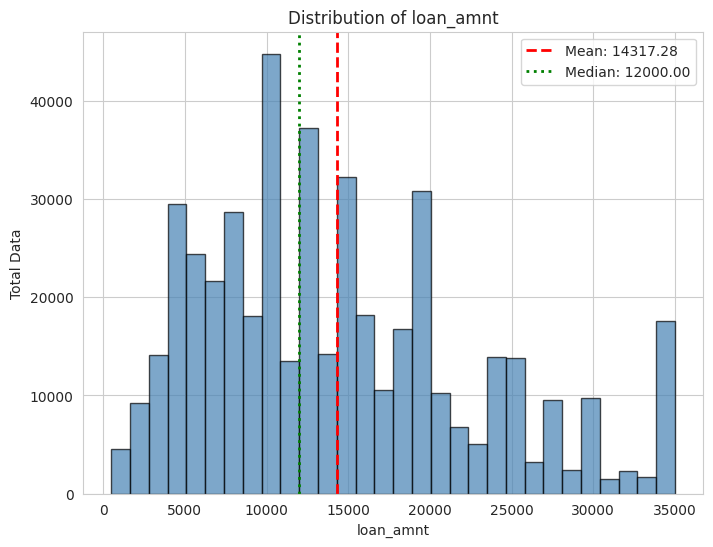

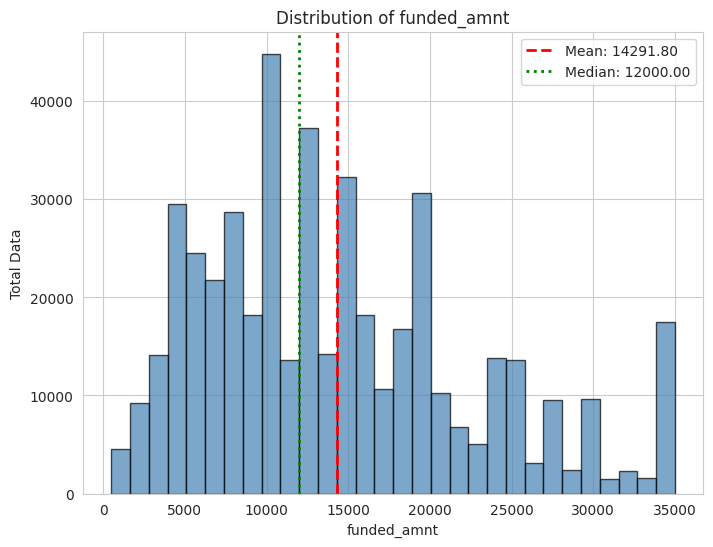

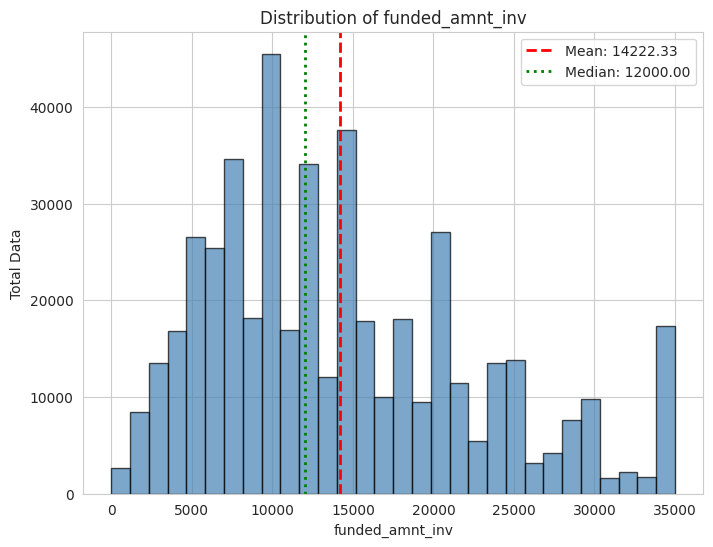

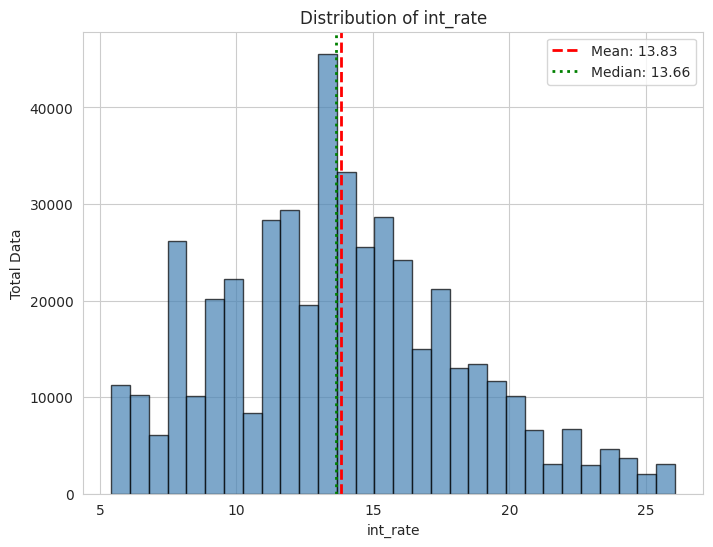

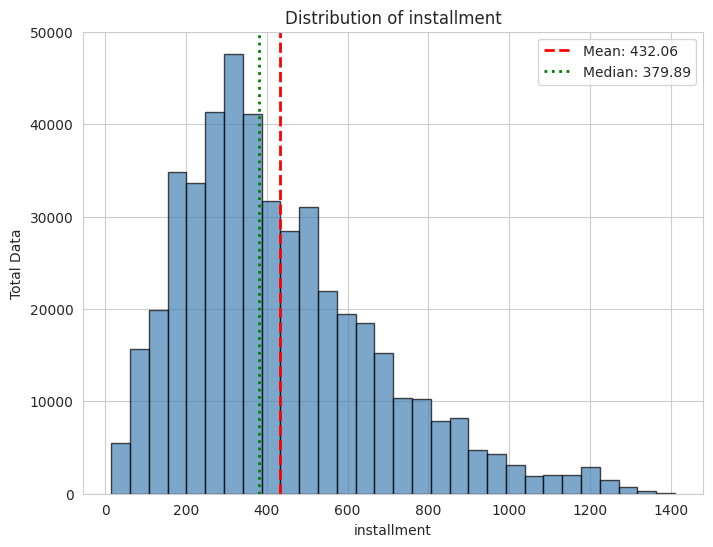

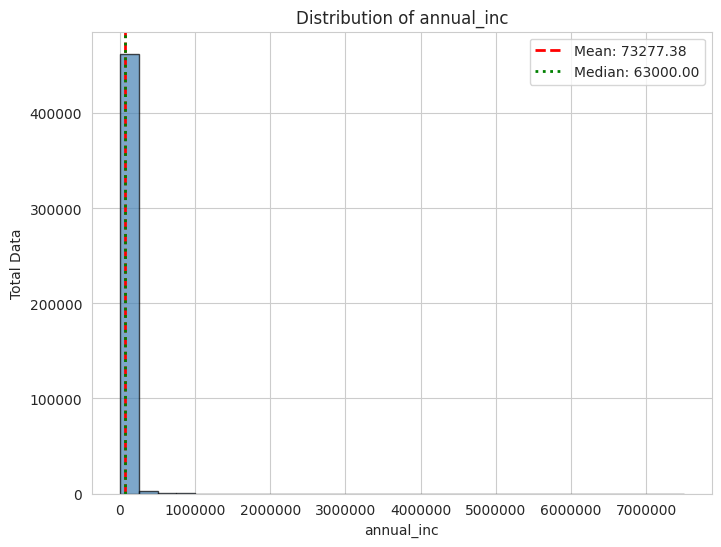

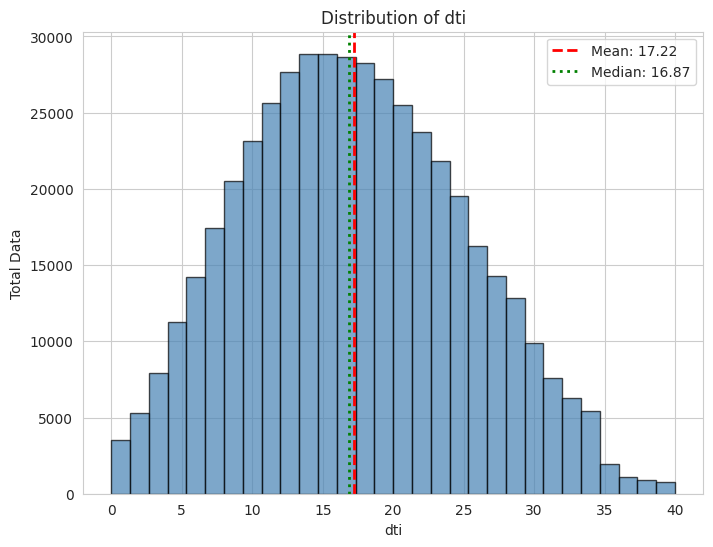

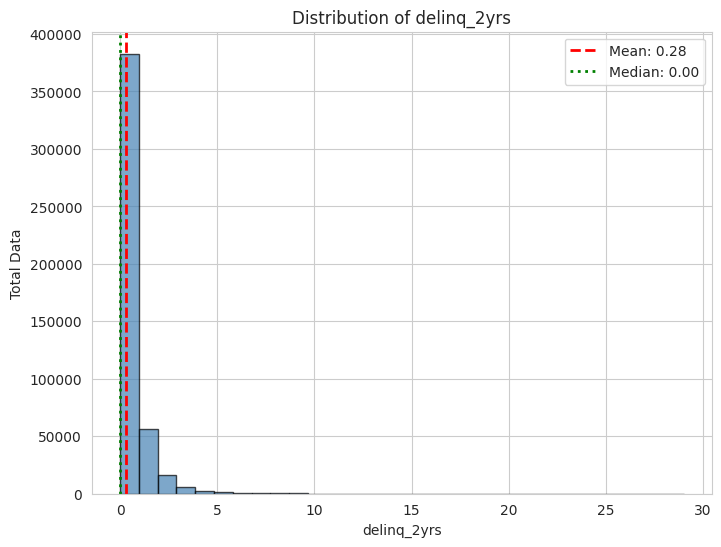

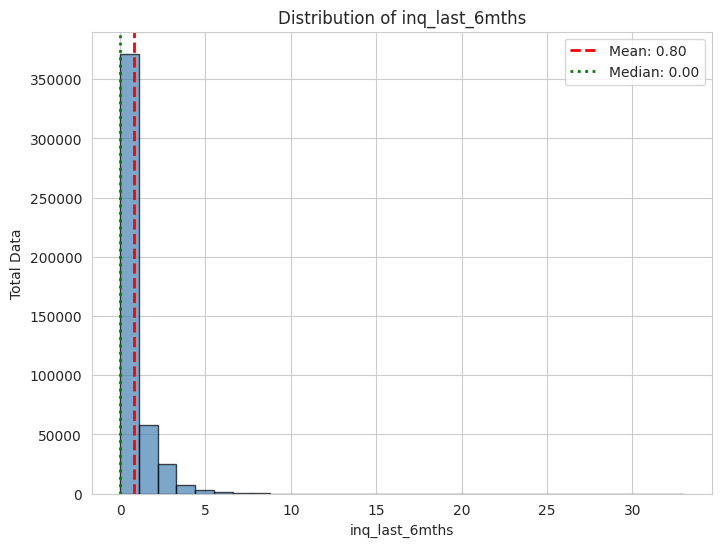

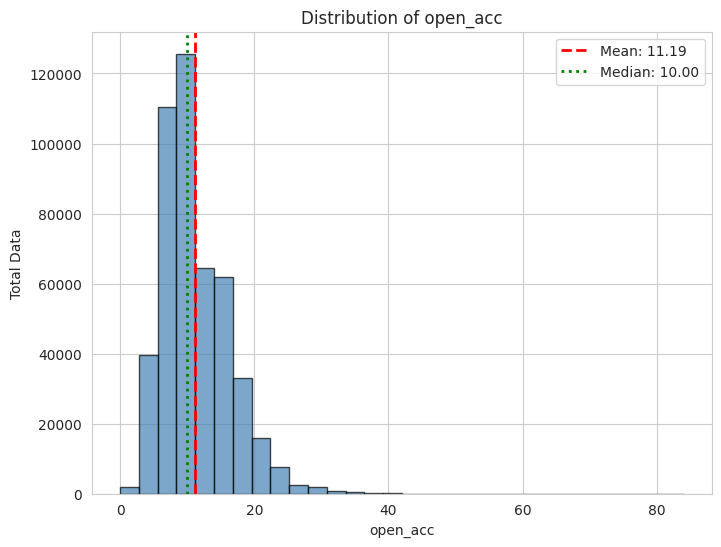

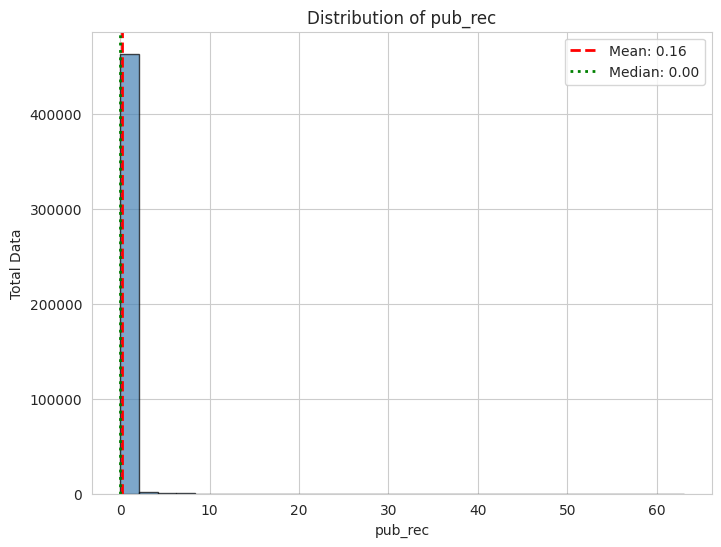

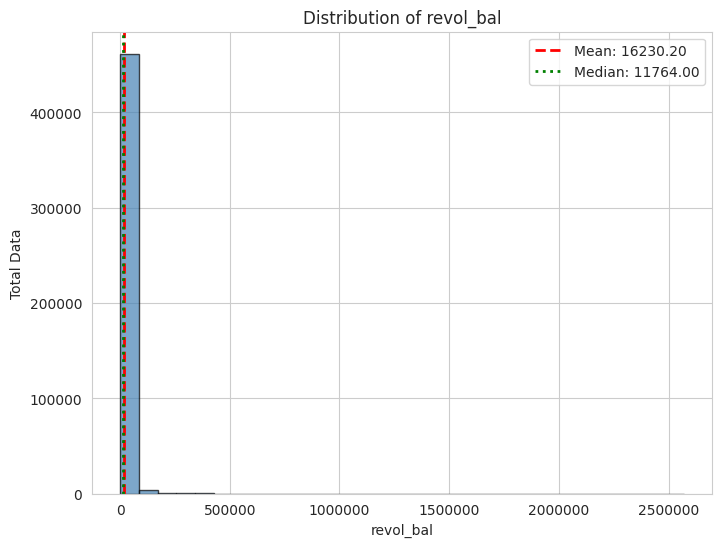

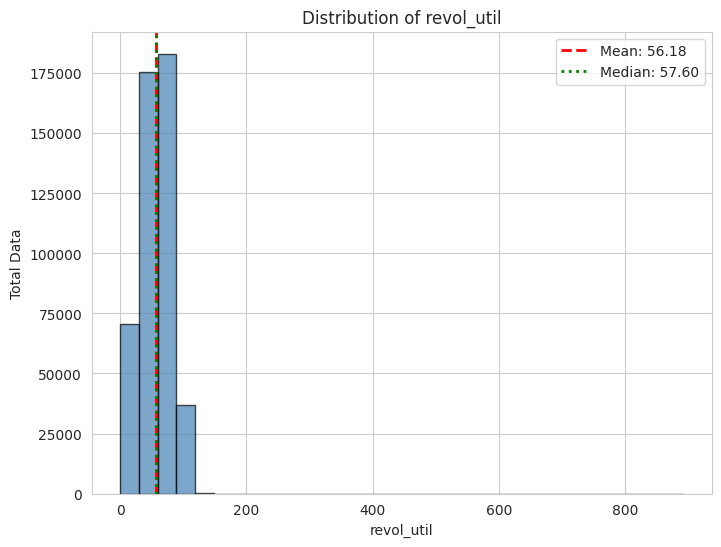

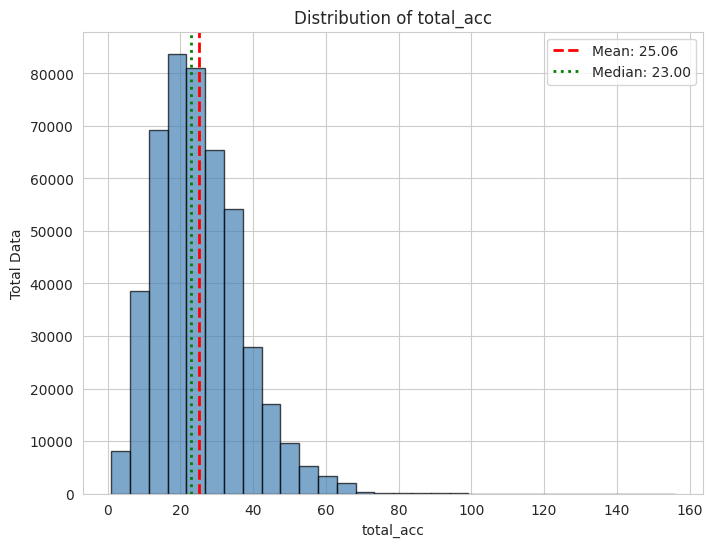

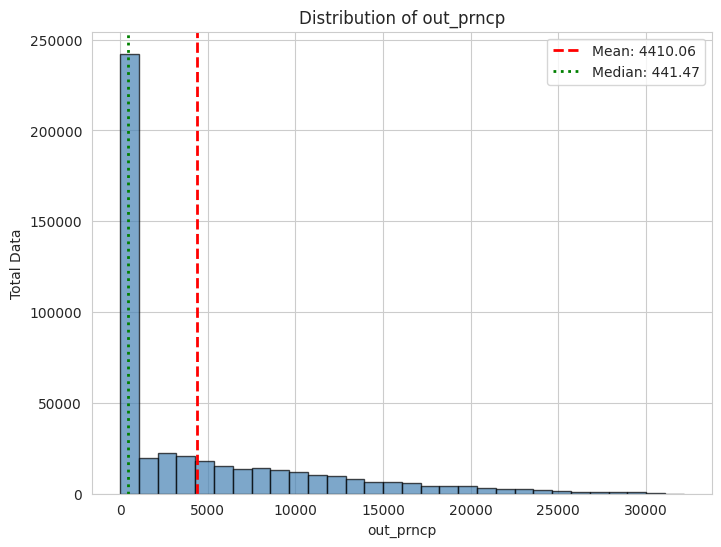

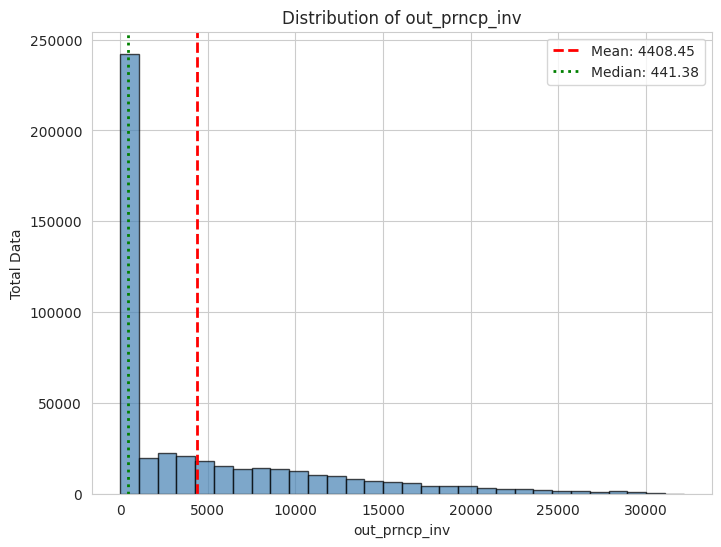

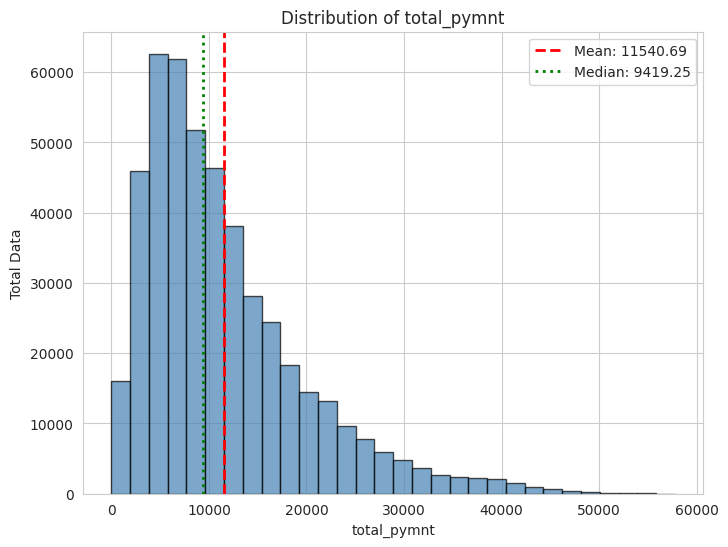

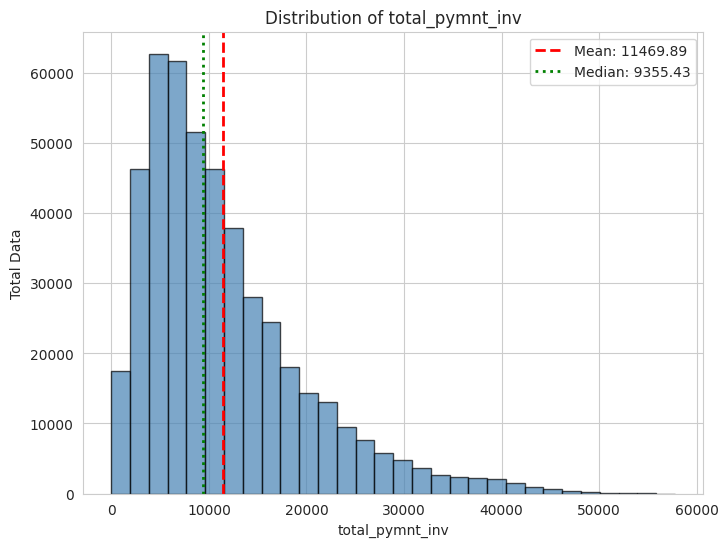

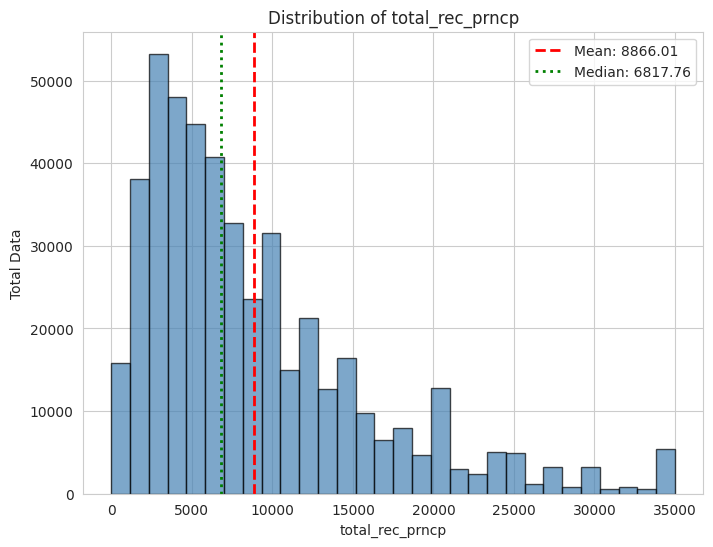

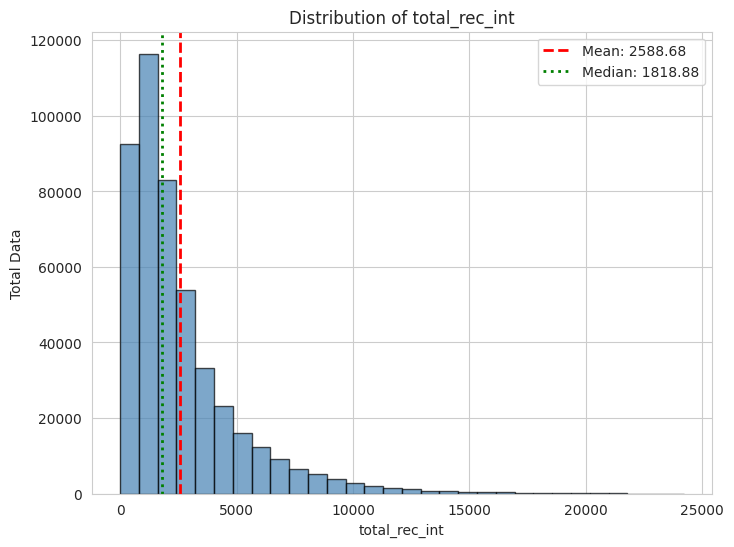

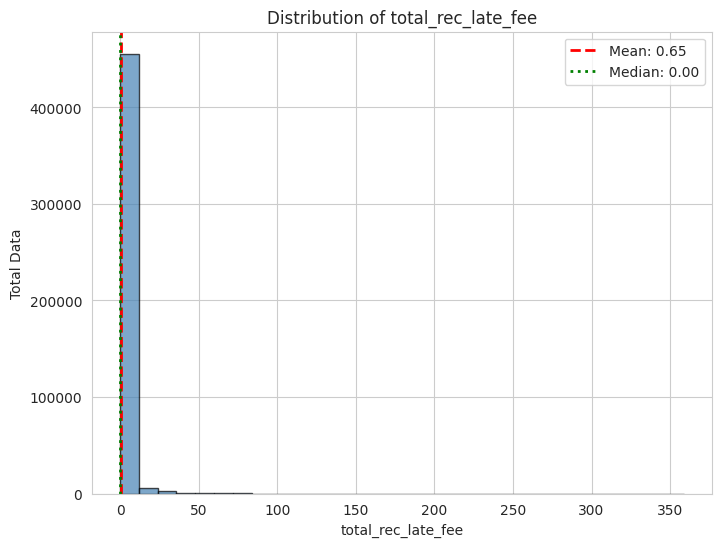

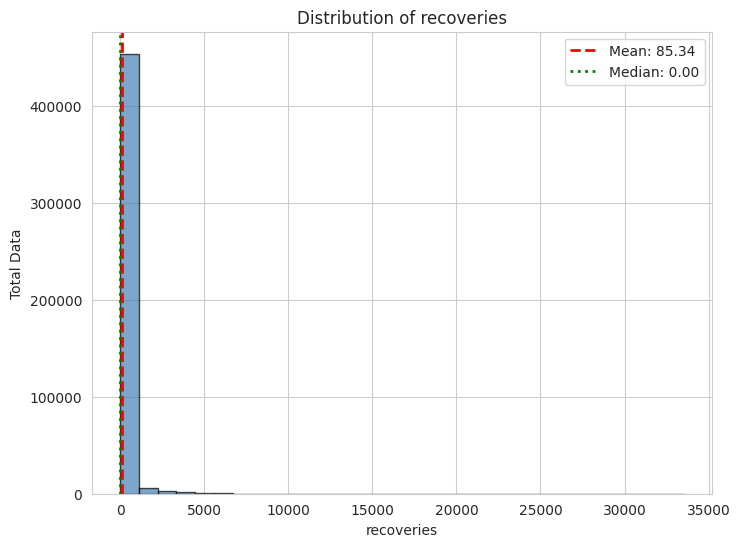

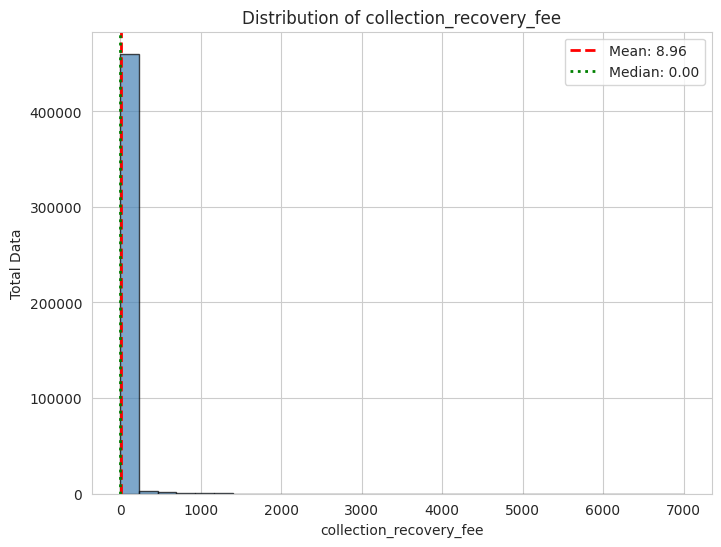

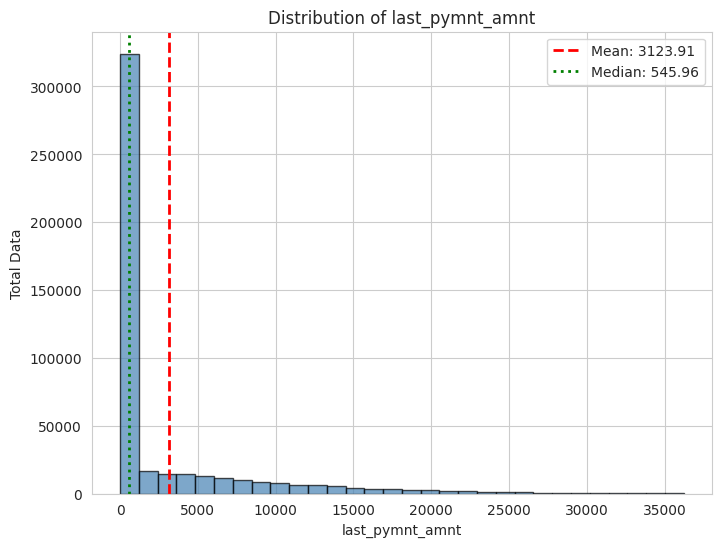

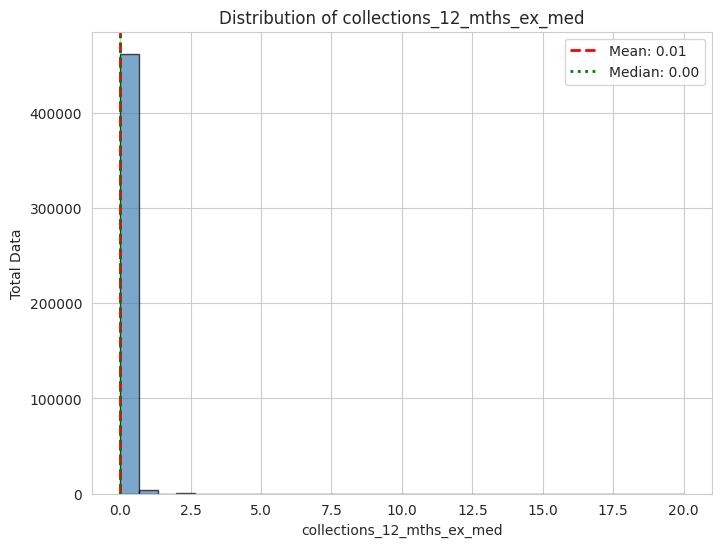

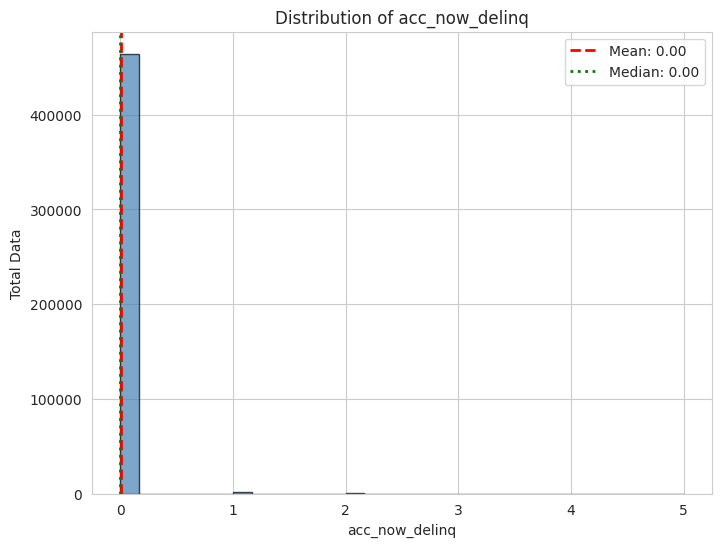

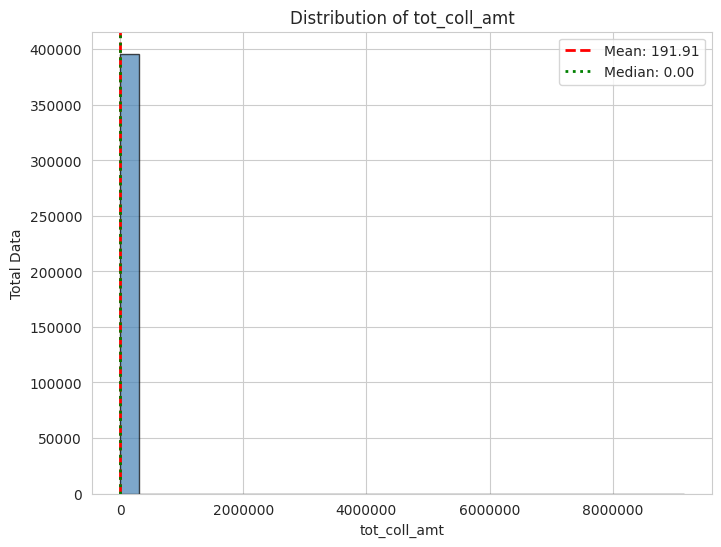

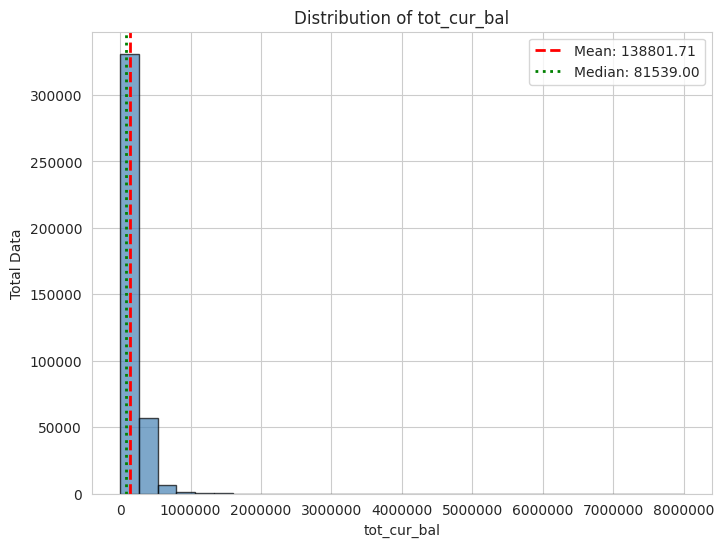

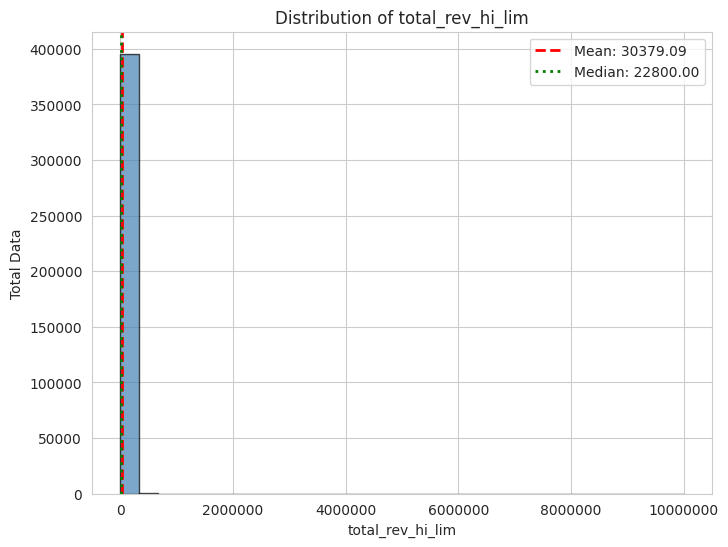

In [29]:
for col in sorted_numeric:
    plot_numeric_column(df[col])

In [30]:
def plot_categorical_column(col):
    data = col.dropna()
    counts = data.value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Percentages of {col.name}")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


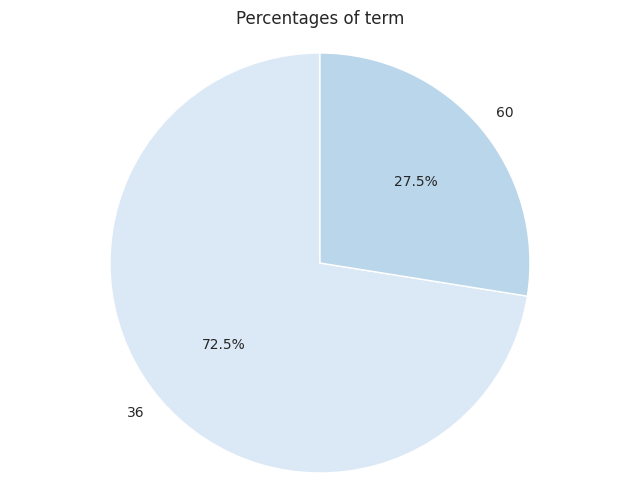

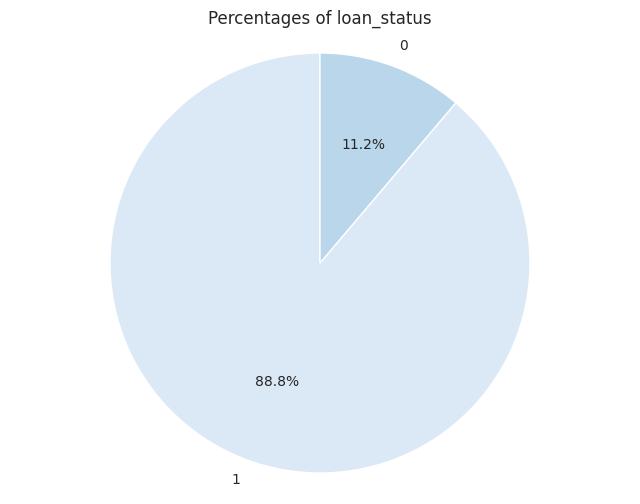

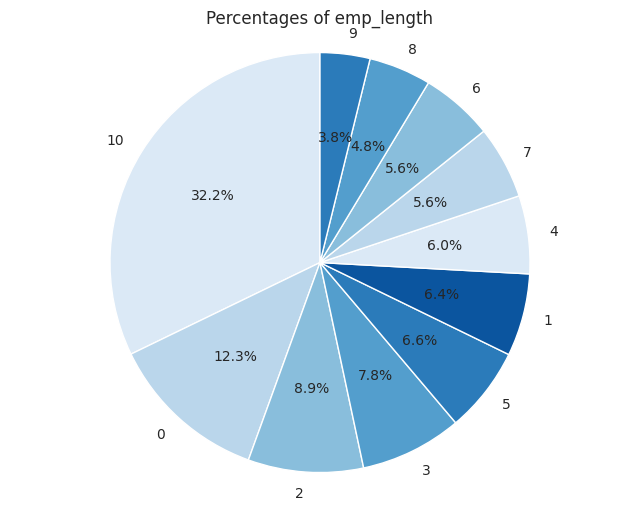

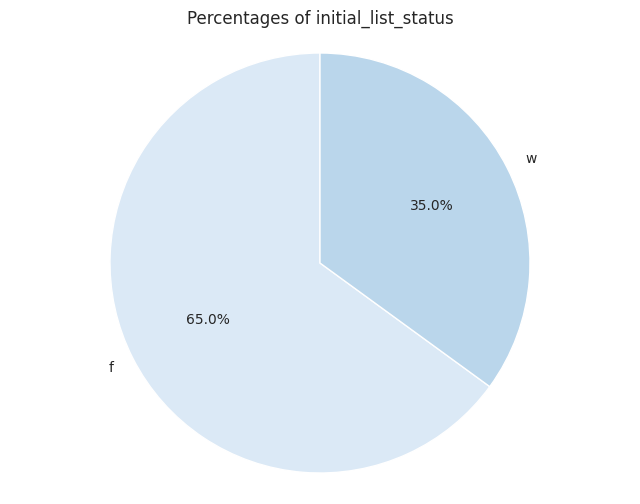

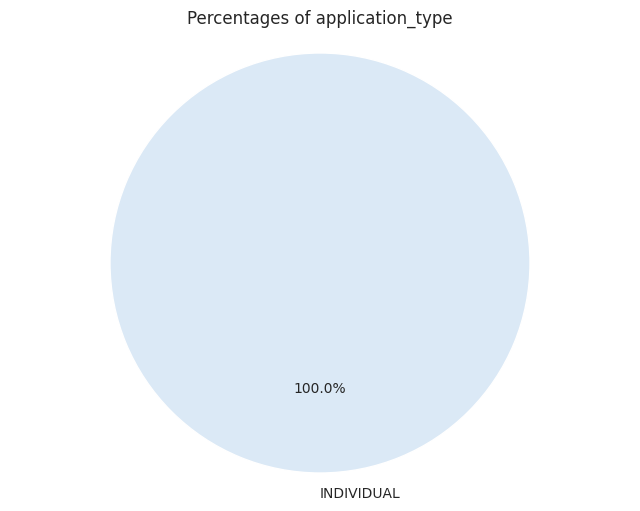

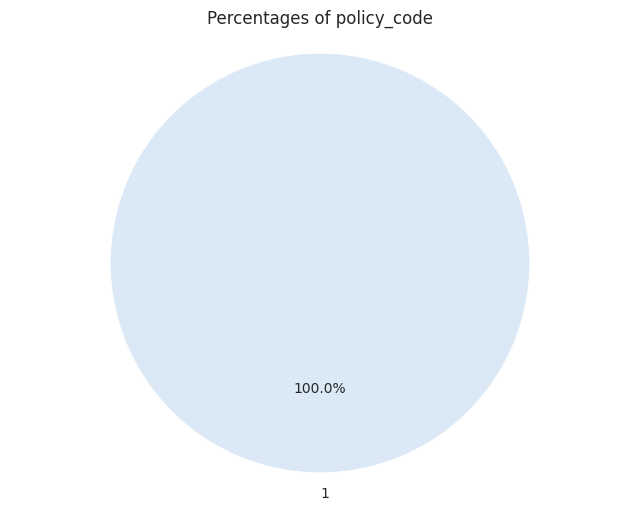

In [31]:
for col in sorted_categoric:
    plot_categorical_column(df[col])

### Bivariate Analysis

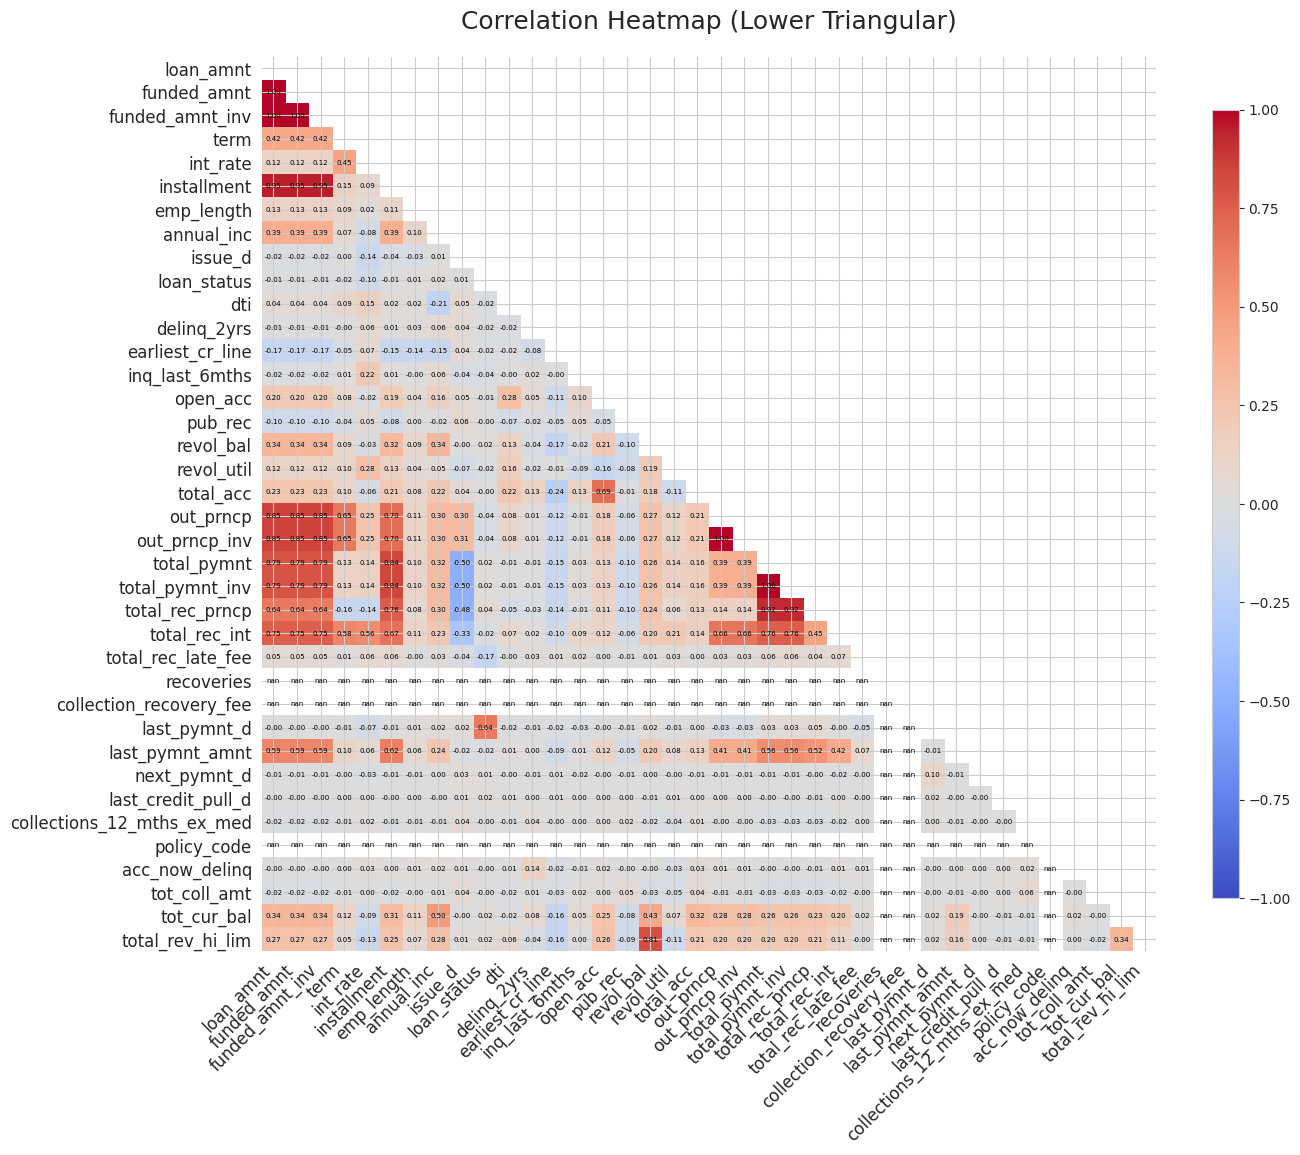

In [32]:
# Misalkan Anda memiliki DataFrame bernama cleaned_df
# Pilih kolom numerik
numeric_cols = [col for col in cleaned_df.columns if cleaned_df[col].dtype != 'object']

# Hitung korelasi
corr = cleaned_df[numeric_cols].corr()

# Buat mask segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ubah nilai segitiga atas menjadi NaN (agar tidak ditampilkan)
masked_corr = np.ma.masked_where(mask, corr)

# Plot
fig, ax = plt.subplots(figsize=(14, 12))

# Tampilkan matriks korelasi yang sudah di-mask
# aspect='equal' atau 'auto' tergantung kebutuhan tampilan
cax = ax.imshow(masked_corr, cmap='coolwarm', vmin=-1, vmax=1, aspect='equal')

# Tambahkan colorbar
cbar = fig.colorbar(cax, shrink=0.8, aspect=30)
cbar.ax.tick_params(labelsize=10)

# Tambahkan grid agar terlihat seperti cell
# (Opsional, jika ingin meniru linewidth pada sns.heatmap)
for edge, spine in ax.spines.items():
    spine.set_visible(False)

# Set label pada axis
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(corr.index, fontsize=12)

# Tambahkan anotasi nilai korelasi
# Loop di setiap sel, hanya untuk segitiga bawah (mask[i,j] == False)
for (i, j), val in np.ndenumerate(corr.values):
    if not mask[i, j]:  # berarti berada di segitiga bawah
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=5, color='black')

# Tambahkan judul
plt.title('Correlation Heatmap (Lower Triangular)', fontsize=18, pad=20)

# Tata letak
plt.tight_layout()
plt.show()

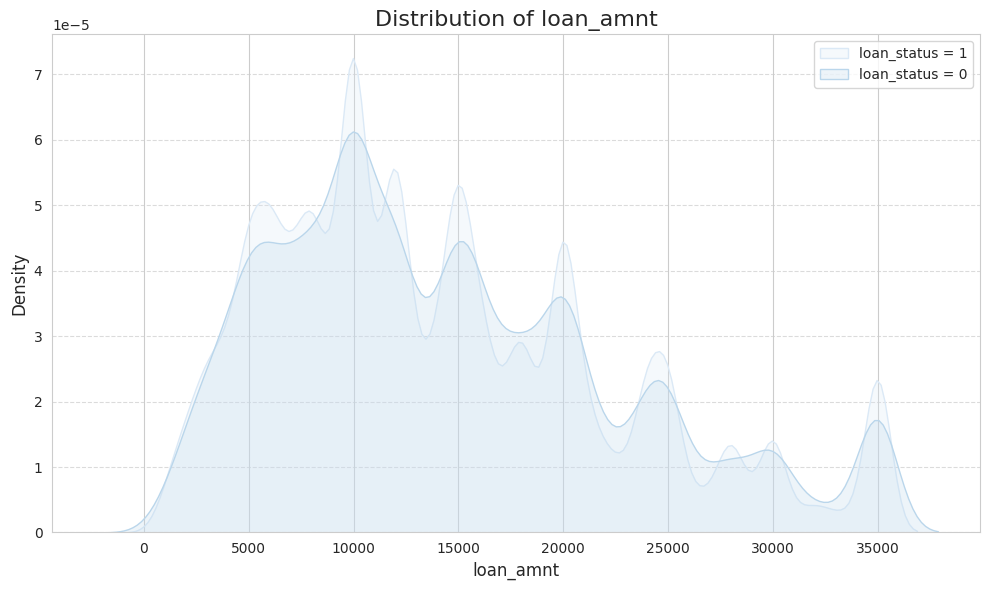

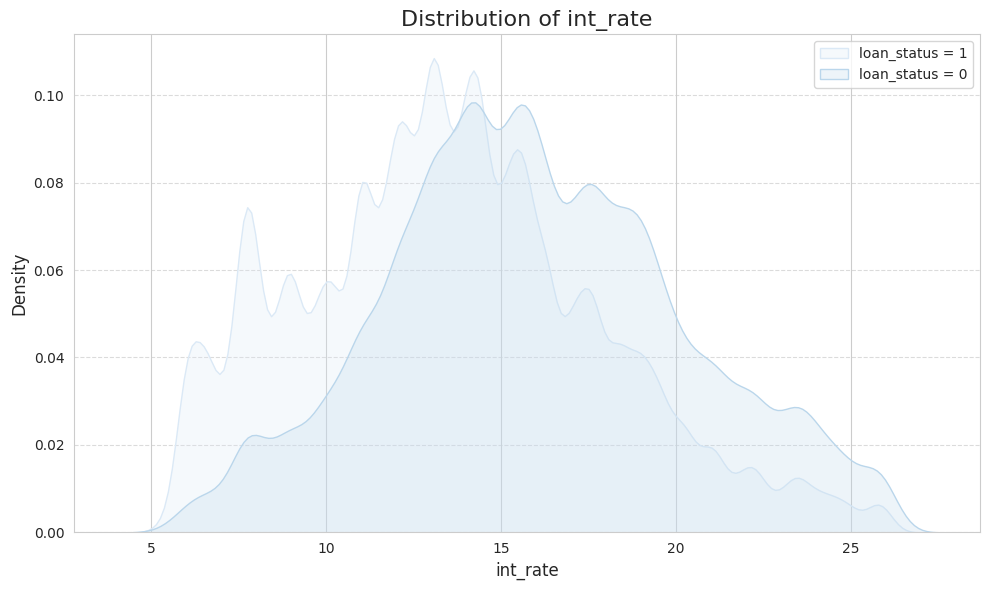

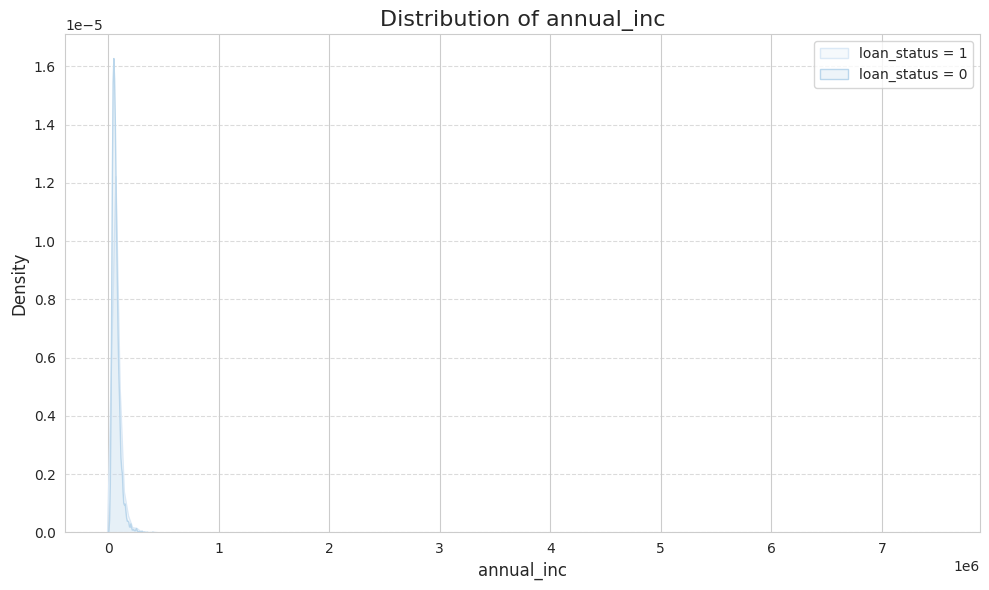

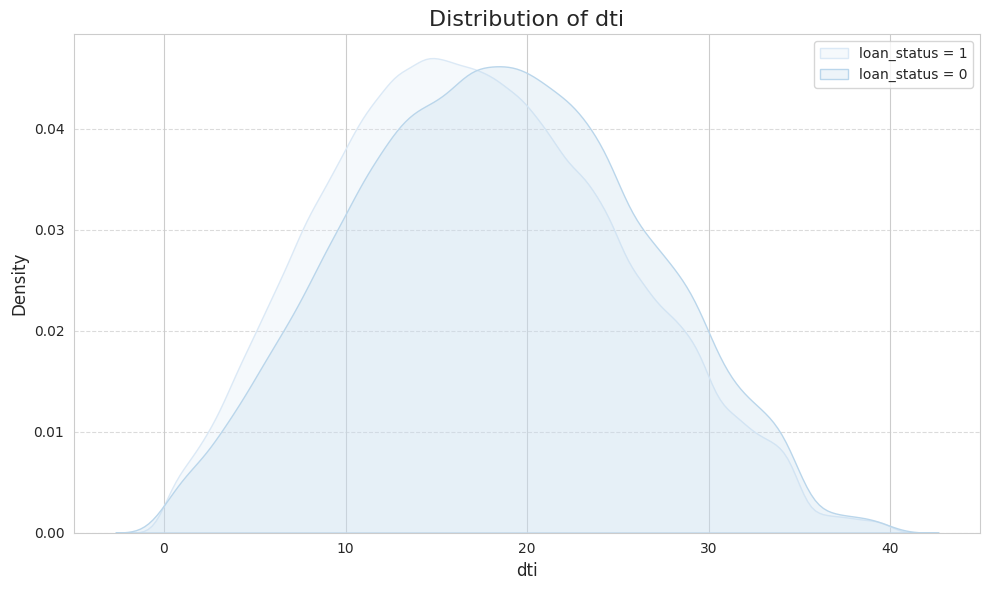

In [33]:
def plot_distribution(data, features, target=None):
    """
    Membuat distribusi histogram dan KDE untuk fitur yang diberikan.

    Parameters:
    - data: DataFrame yang berisi dataset.
    - features: List dari fitur yang akan dianalisis.
    - target: (Optional) Variabel target untuk visualisasi grup.
    """
    for feature in features:
        plt.figure(figsize=(10, 6))

        # Plot histogram dan KDE
        if target:
            # Jika target diberikan, distribusi dipisahkan berdasarkan grup
            for label in data[target].unique():
                sns.kdeplot(
                    data=data[data[target] == label][feature],
                    label=f"{target} = {label}",
                    fill=True
                )
        else:
            sns.histplot(data[feature], kde=True, bins=30, color='blue', alpha=0.6)

        # Pengaturan plot
        plt.title(f"Distribution of {feature}", fontsize=16)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        if target:
            plt.legend()
        plt.tight_layout()
        plt.show()

# Contoh penggunaan
features_to_analyze = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
plot_distribution(df, features_to_analyze, target='loan_status')

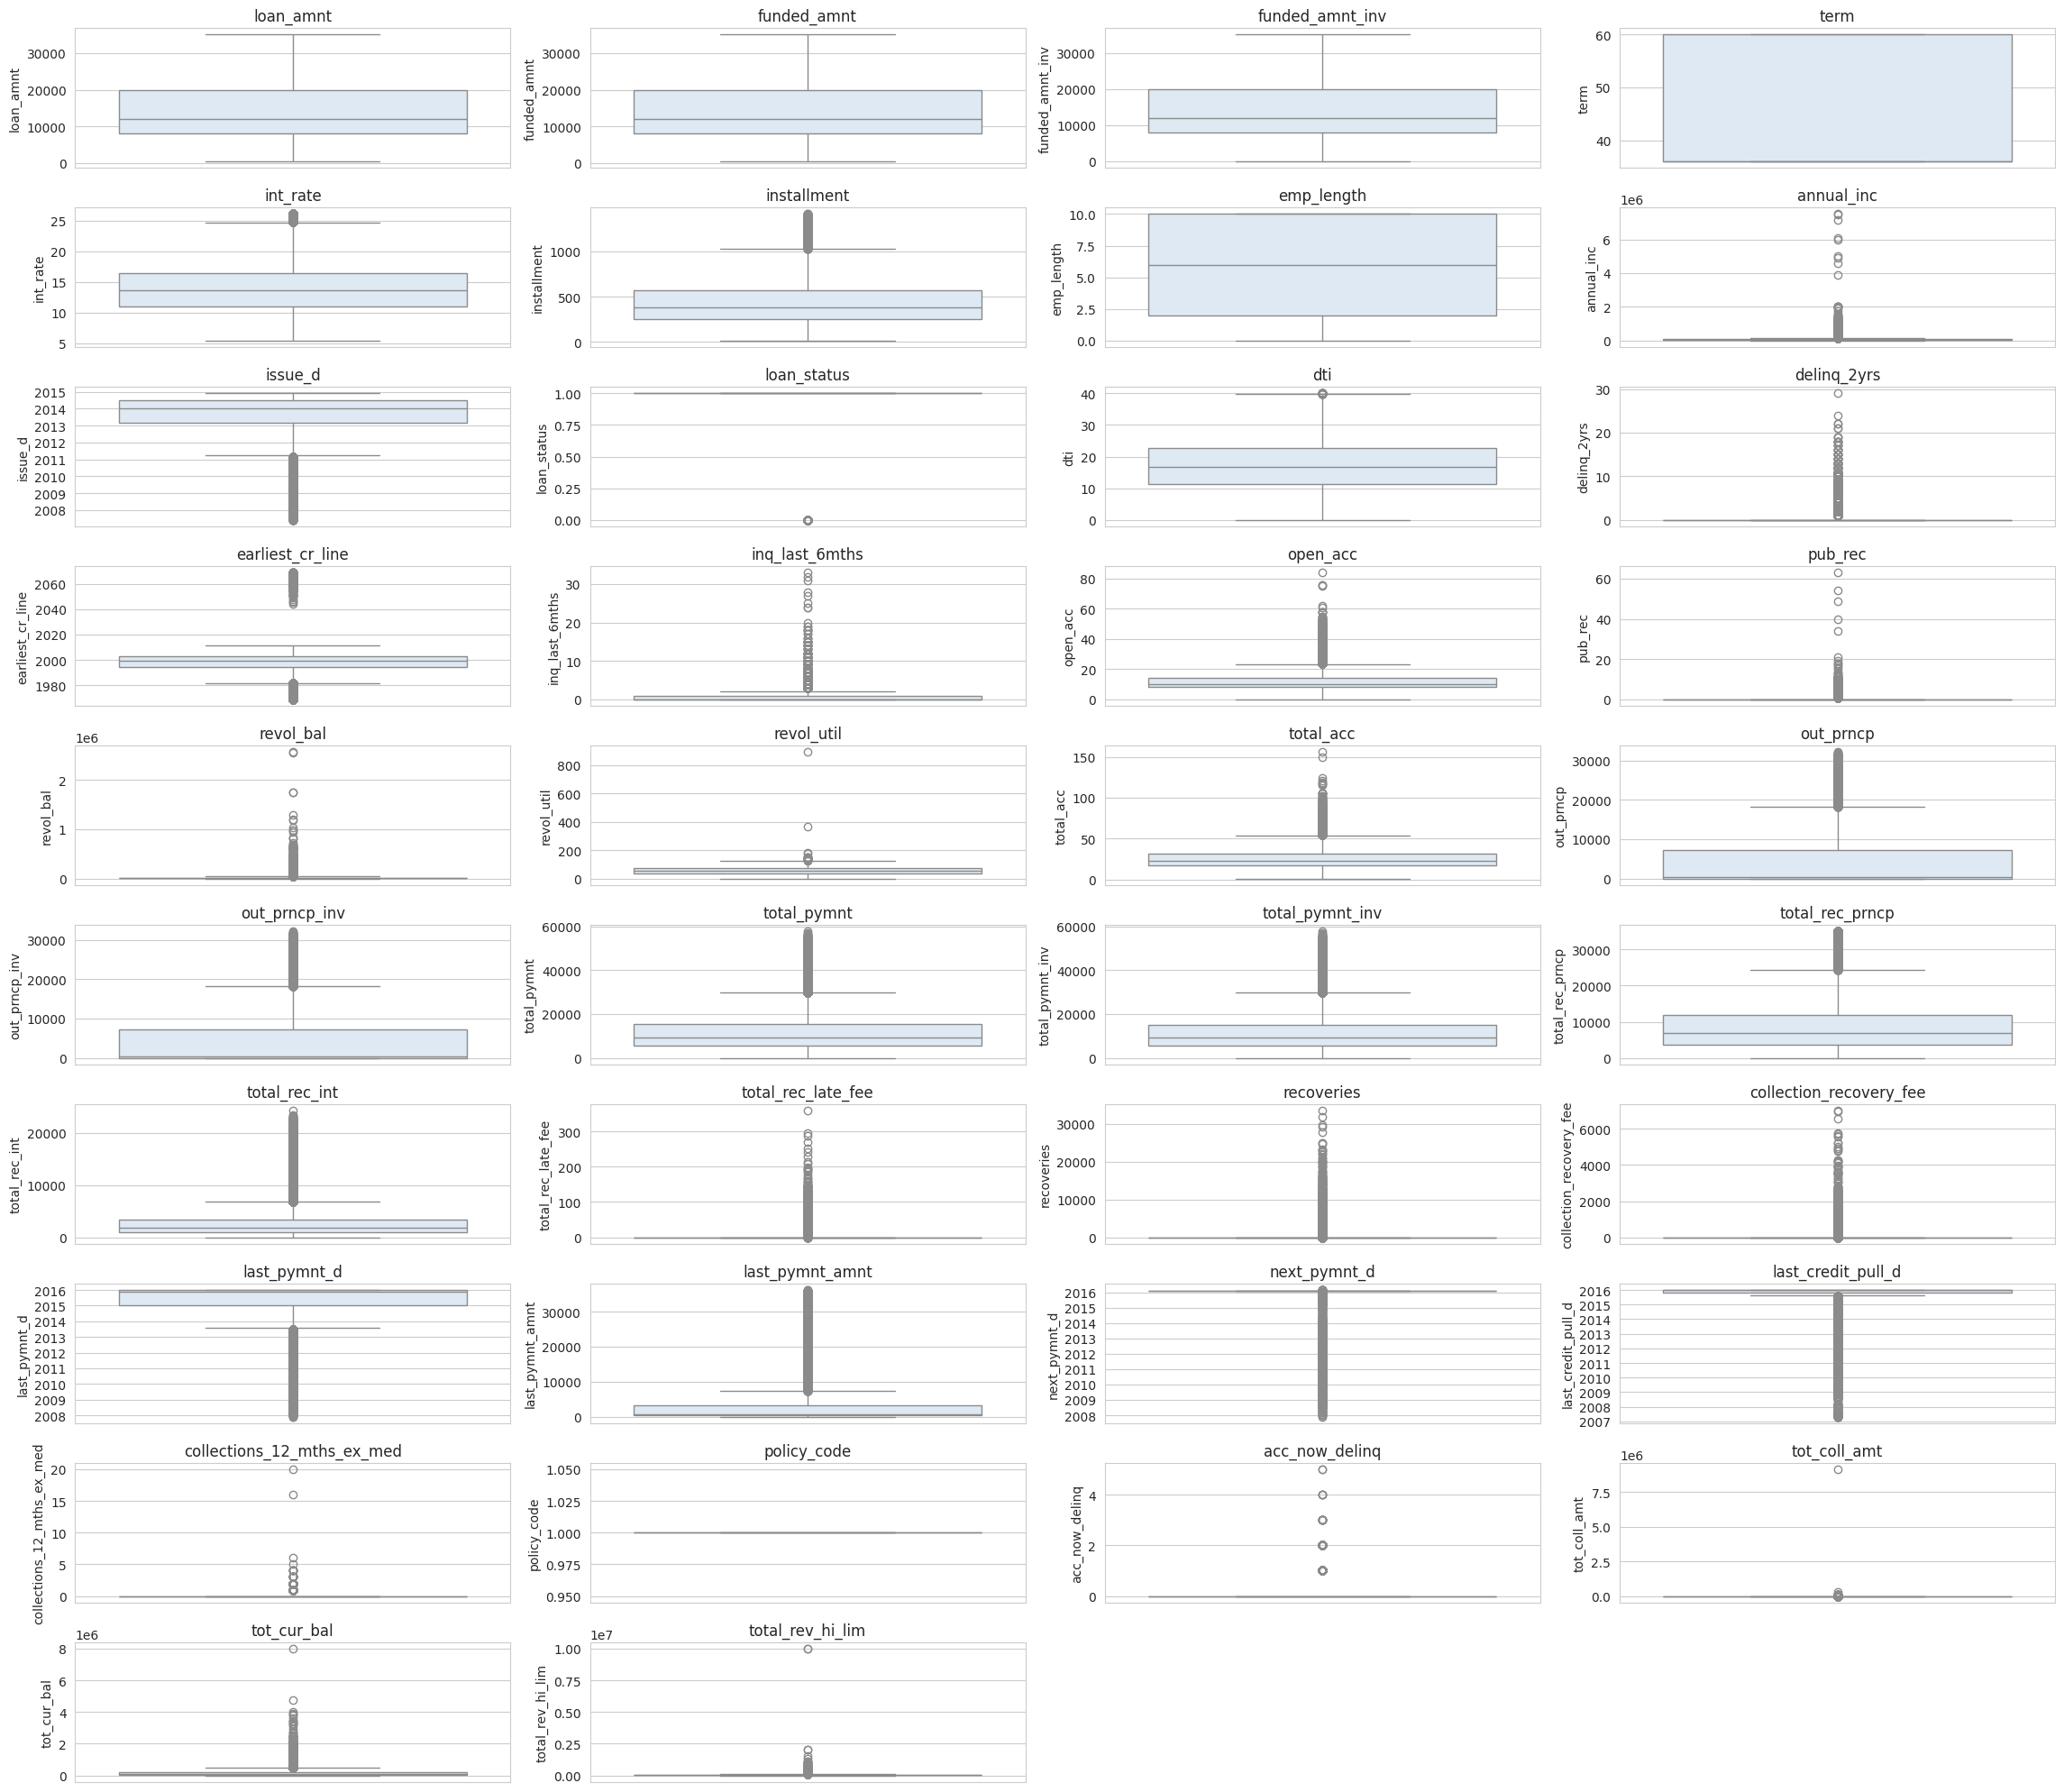

In [34]:
plt.figure(figsize=(23, 20))
num_rows = (len(numeric_cols) // 4) + 1
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=12)
plt.tight_layout()
plt.show()


## Data Preparation

## Feature Engineering

In [35]:
import numpy as np
import pandas as pd

# Misalnya kita punya DataFrame cleaned_df
# 1. Ambil kolom numerik
numeric_cols = [col for col in cleaned_df.columns if cleaned_df[col].dtype != 'object']

# 2. Hitung matriks korelasi (nilai absolut)
corr_matrix = cleaned_df[numeric_cols].corr().abs()

# 3. Ambil segitiga atas untuk menghindari duplikasi pasangan
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 4. Ambil nama-nama kolom yang muncul dalam pasangan dengan korelasi > 0.5 (kecuali nilai 1)
threshold = 0.5
high_corr_features = set()
for col in upper_tri.columns:
    # Seleksi nilai yang memenuhi syarat
    high_corr = upper_tri[col][(upper_tri[col] > threshold) & (upper_tri[col] < 1)]
    if not high_corr.empty:
        # Tambahkan nama kolom yang ada di baris dan kolom
        high_corr_features.add(col)
        high_corr_features.update(high_corr.index)

# Konversi ke list dan urutkan (opsional)
high_corr_features = sorted(list(high_corr_features))
print("Fitur yang memiliki korelasi lebih dari 0.5 (kecuali korelasi 1):")
print(high_corr_features)

Fitur yang memiliki korelasi lebih dari 0.5 (kecuali korelasi 1):
['funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'revol_bal', 'term', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp', 'total_rev_hi_lim']


In [36]:
cleaned_df_important = cleaned_df[high_corr_features]
cleaned_df_important.head()

,funded_amnt,funded_amnt_inv,installment,int_rate,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,open_acc,out_prncp,out_prncp_inv,revol_bal,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_prncp,total_rev_hi_lim
42535,27050,27050.0,885.46,10.99,885.46,2016-01-01,27050,1,14.0,10018.90,10018.90,36638,36,27.0,21251.04,21251.04,4219.94,17031.10,59900.0
42536,9750,9750.0,333.14,13.98,333.14,2016-01-01,9750,1,12.0,3710.96,3710.96,7967,36,28.0,7994.83,7994.83,1955.79,6039.04,15100.0
42537,12000,12000.0,368.45,6.62,368.45,2016-01-01,12000,1,12.0,4266.62,4266.62,13168,36,22.0,8842.80,8842.80,1109.42,7733.38,61100.0
42539,15000,15000.0,476.30,8.90,476.30,2016-01-01,15000,1,8.0,5449.27,5449.27,11431,36,29.0,11431.20,11431.20,1880.47,9550.73,15400.0
42540,12000,12000.0,398.52,11.99,398.52,2016-01-01,12000,1,9.0,4485.45,4485.45,10805,36,19.0,9564.40,9564.40,2049.85,7514.55,16200.0


In [37]:
cleaned_df_important.shape

(232372, 19)

In [38]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
# Pastikan 'loan_status' adalah target dan fitur lainnya merupakan kolom numerik.
X = cleaned_df_important.drop('loan_status', axis=1)
y = cleaned_df_important['loan_status']

# Jika ada kolom non-numerik di X, pilih hanya kolom numerik.
X = X.select_dtypes(include=[np.number])

# Tampilkan distribusi kelas sebelum oversampling
print("Distribusi sebelum SMOTE:", Counter(y))

# Terapkan SMOTE untuk menghasilkan sampel sintetik bagi kelas minoritas
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tampilkan distribusi kelas setelah oversampling
print("Distribusi setelah SMOTE:", Counter(y_resampled))

# Bagi data hasil oversampling menjadi train set dan test set:
# - test_size=0.2: 20% data dialokasikan sebagai test set.
# - stratify=y_resampled: Memastikan distribusi kelas pada train dan test set sama seperti pada data resampled.
# - random_state=42: Memastikan reproducibility split data.
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


Distribusi sebelum SMOTE: Counter({1: 223593, 0: 8779})
Distribusi setelah SMOTE: Counter({1: 223593, 0: 223593})


In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((357748, 17), (89438, 17), (357748,), (89438,))

## Modeling

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:33:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


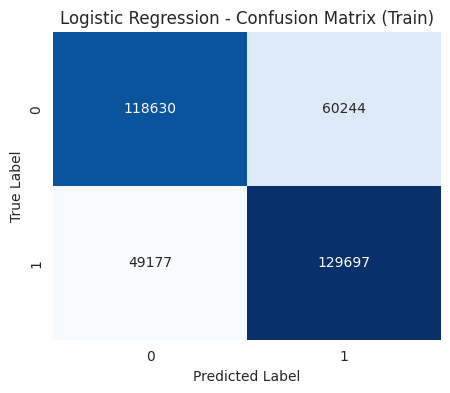

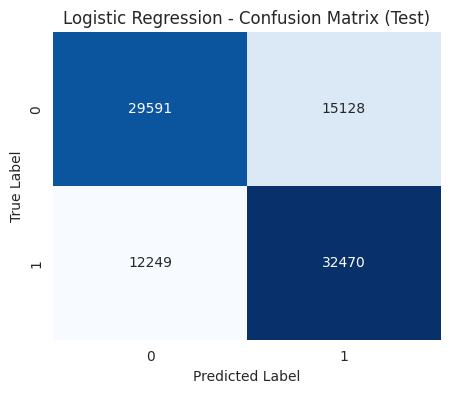

=== Logistic Regression ===
Train Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68    178874
           1       0.68      0.73      0.70    178874

    accuracy                           0.69    357748
   macro avg       0.69      0.69      0.69    357748
weighted avg       0.69      0.69      0.69    357748

Train Accuracy: 0.6941394501157239

Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.68     44719
           1       0.68      0.73      0.70     44719

    accuracy                           0.69     89438
   macro avg       0.69      0.69      0.69     89438
weighted avg       0.69      0.69      0.69     89438

Test Accuracy: 0.6938996846977795


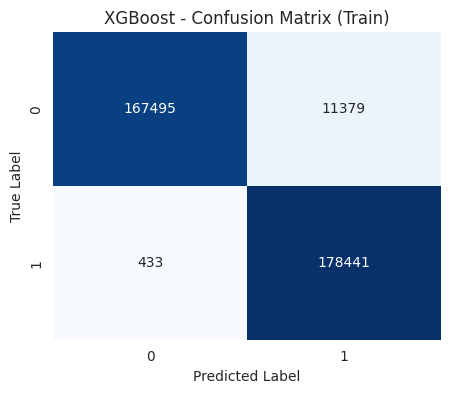

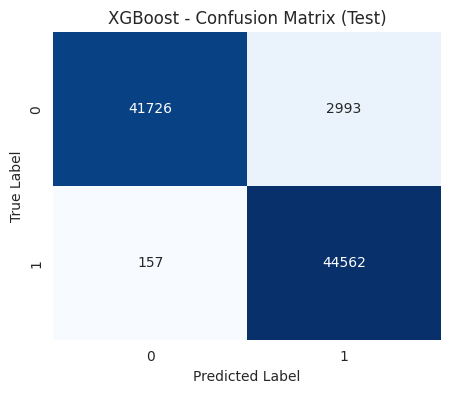

=== XGBoost ===
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    178874
           1       0.94      1.00      0.97    178874

    accuracy                           0.97    357748
   macro avg       0.97      0.97      0.97    357748
weighted avg       0.97      0.97      0.97    357748

Train Accuracy: 0.9669823451144381

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     44719
           1       0.94      1.00      0.97     44719

    accuracy                           0.96     89438
   macro avg       0.97      0.96      0.96     89438
weighted avg       0.97      0.96      0.96     89438

Test Accuracy: 0.9647800711107136


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

# --- Inisialisasi dan Pelatihan Model ---

# Model Logistic Regression dengan max_iter=300
logreg = LogisticRegression(random_state=42, max_iter=300)
logreg.fit(X_train, y_train)

# Model XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# --- Evaluasi Model Logistic Regression ---

# Prediksi untuk data training dan testing
y_train_pred_logreg = logreg.predict(X_train)
y_test_pred_logreg = logreg.predict(X_test)

# Fungsi untuk menampilkan confusion matrix dengan heatmap
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Hitung confusion matrix untuk Logistic Regression
cm_logreg_train = confusion_matrix(y_train, y_train_pred_logreg)
cm_logreg_test = confusion_matrix(y_test, y_test_pred_logreg)

# Tampilkan confusion matrix
plot_confusion_matrix(cm_logreg_train, "Logistic Regression - Confusion Matrix (Train)")
plot_confusion_matrix(cm_logreg_test, "Logistic Regression - Confusion Matrix (Test)")

# Tampilkan classification report dan akurasi untuk Logistic Regression
print("=== Logistic Regression ===")
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred_logreg))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_logreg))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_logreg))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_logreg))


# --- Evaluasi Model XGBoost ---

# Prediksi untuk data training dan testing
y_train_pred_xgb = xgb_clf.predict(X_train)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Hitung confusion matrix untuk XGBoost
cm_xgb_train = confusion_matrix(y_train, y_train_pred_xgb)
cm_xgb_test = confusion_matrix(y_test, y_test_pred_xgb)

# Tampilkan confusion matrix
plot_confusion_matrix(cm_xgb_train, "XGBoost - Confusion Matrix (Train)")
plot_confusion_matrix(cm_xgb_test, "XGBoost - Confusion Matrix (Test)")

# Tampilkan classification report dan akurasi untuk XGBoost
print("=== XGBoost ===")
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred_xgb))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_xgb))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_xgb))


## Evaluation

<ipython-input-41-fe833e171879>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index, palette="viridis")


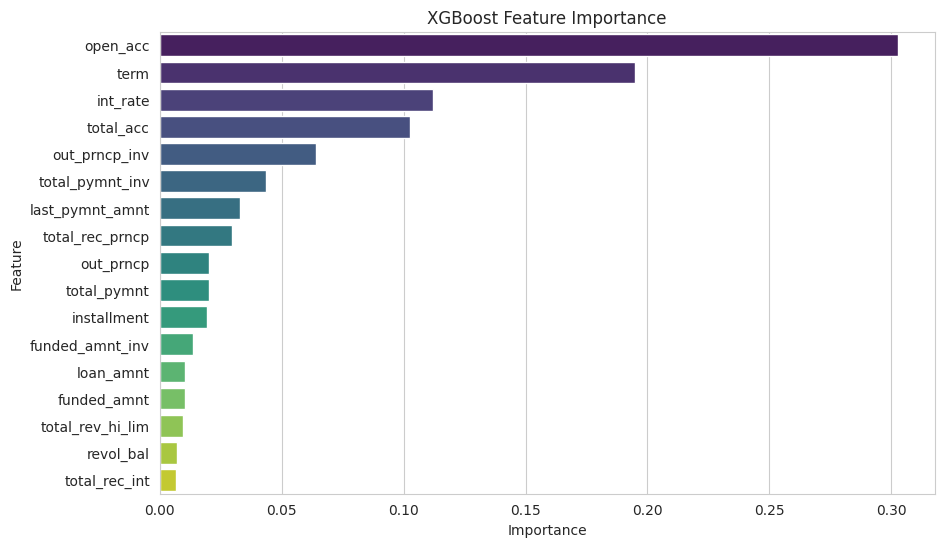

<ipython-input-41-fe833e171879>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logreg_coef.values, y=logreg_coef.index, palette="rocket")


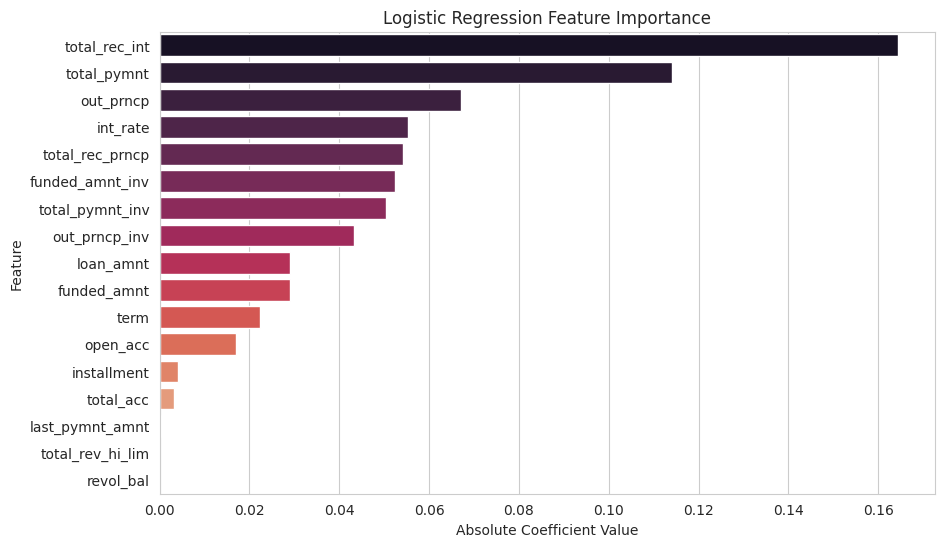

In [41]:
# --- Visualisasi Feature Importance dari XGBoost ---
feature_importances_xgb = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
feature_importances_xgb = feature_importances_xgb.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index, palette="viridis")
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# --- Visualisasi Feature Importance untuk Logistic Regression ---
# Karena data sudah dinormalisasi, nilai absolut dari koefisien dapat digunakan sebagai importance.
logreg_coef = pd.Series(np.abs(logreg.coef_[0]), index=X_train.columns)
logreg_coef = logreg_coef.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=logreg_coef.values, y=logreg_coef.index, palette="rocket")
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()